# Problem 1


You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
##
##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##
##

from google.colab import files
uploaded = files.upload()

Saving Election_Data.xlsx to Election_Data.xlsx


In [3]:
##
##

election1 = pd.ExcelFile("Election_Data.xlsx")
sheetnames = election1.sheet_names
sheetnames



['Sheet1', 'Election_Dataset_Two Classes']

In [4]:
##
##

election1_sheet1 = pd.read_excel("Election_Data.xlsx", sheet_name = 'Sheet1')
election1_sheet2 = pd.read_excel("Election_Data.xlsx", sheet_name = 'Election_Dataset_Two Classes')


In [5]:
##
##

election1_sheet1.head()

**Data Dictionary**
0                                            NaN
1  1. vote: Party choice: Conservative or Labour
2                                            NaN
3                               2. age: in years
4                                            NaN

In [6]:
##
## sheet 2 is the actual data so using that as our base

election1_sheet2.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

## 1.1

Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

- A simple description is expected, and make the same


In [7]:
##
## let's see data description

for col1, col2 in election1_sheet1.itertuples():
    print(col2)


nan
1. vote: Party choice: Conservative or Labour
nan
2. age: in years
nan
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
nan
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
nan
5. Blair: Assessment of the Labour leader, 1 to 5.
nan
6. Hague: Assessment of the Conservative leader, 1 to 5.
nan
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
nan
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
nan
9. gender: female or male.


In [8]:
##
##

election1 = election1_sheet2.copy()
election1.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [9]:
##
##

election1.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [10]:
##
## it seems like the first column "Unnamed: 0" seems to be a record number, so lets change that to be the original row index.

election1 = election1.set_index('Unnamed: 0')
election1.head()

vote  age  economic.cond.national  economic.cond.household  \
Unnamed: 0                                                                 
1           Labour   43                       3                        3   
2           Labour   36                       4                        4   
3           Labour   35                       4                        4   
4           Labour   24                       4                        2   
5           Labour   41                       2                        2   

            Blair  Hague  Europe  political.knowledge  gender  
Unnamed: 0                                                     
1               4      1       2                    2  female  
2               4      4       5                    2    male  
3               5      2       3                    2    male  
4               2      1       4                    0  female  
5               1      1       6                    2    male

In [11]:
##
## we do not have any null values which is a very good thing.
## all columns excep 'vote' and 'gender' are numerical
## it would be better to rename the columns that have a '.' in them as sometime they might hinder with code, but let's see *_*
## how it works just like this and make the decision

election1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [12]:
##
## summary statistics of the dataframe
## this will only provide the numerical statistics
## a lot of the features are numerically categorical(like 5 star ratings) and are confined to a very specific integer only scale *_*
## hence the similarity in values
## we do have some 0.0 values in the political knowlegde column(almost 25%), but this is an allowed value, the only column to have so

election1.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [13]:
##
## statistics of the object columns
## The feature vote is skewed towards value 'Labour'
## the feature Gender is not skewed and somewhat normal

print('Counts for feature - vote')
print(election1['vote'].value_counts())
print('\n')
print("Now for feature -  Gender")
print(election1['gender'].value_counts())


Counts for feature - vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


Now for feature -  Gender
female    812
male      713
Name: gender, dtype: int64


In [14]:
##
## let's see if there are any duplicates in the system
## we can expect them as the nature of the data is so


election1.duplicated().sum()

## ahaa, we have duplicates, but surprisingly they count is very less at 8, this is less than 1 percent of the total volumn *_*
## we can remove them now and it should not hinder us, but let's analyze more before we make the decision.

8

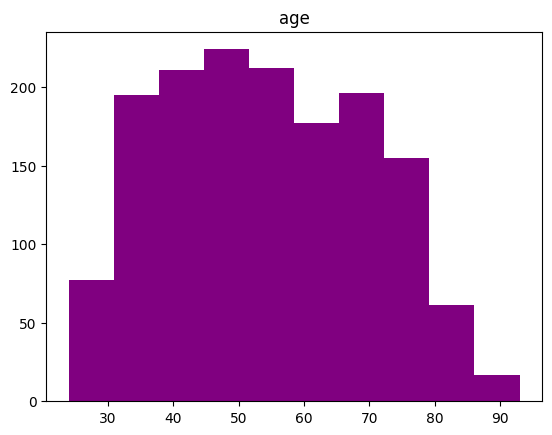

Skewness for age:0.145


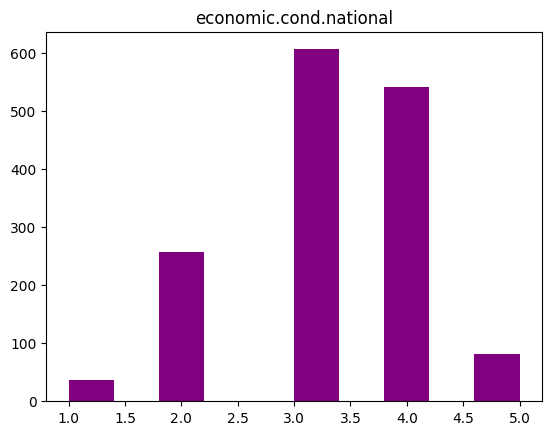

Skewness for economic.cond.national:-0.24


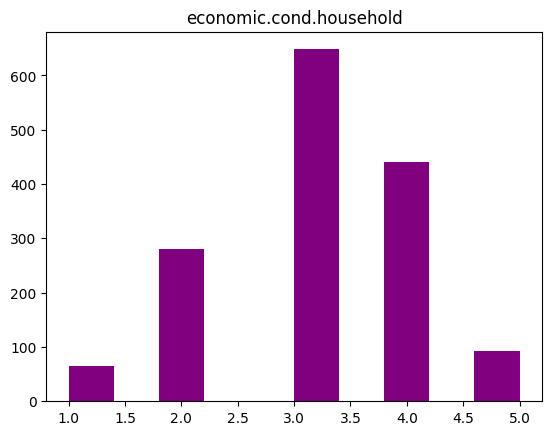

Skewness for economic.cond.household:-0.15


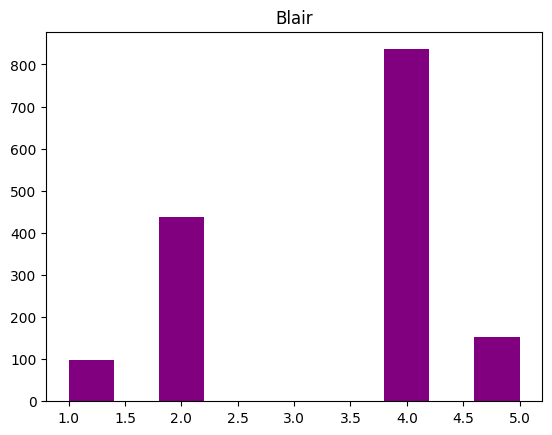

Skewness for Blair:-0.535


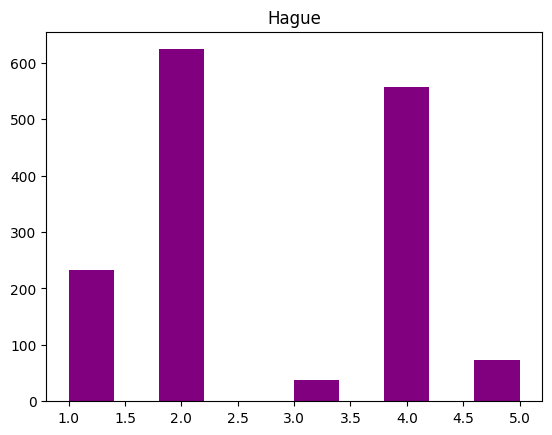

Skewness for Hague:0.152


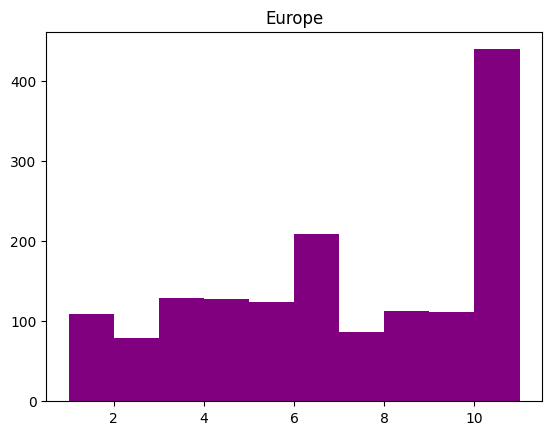

Skewness for Europe:-0.136


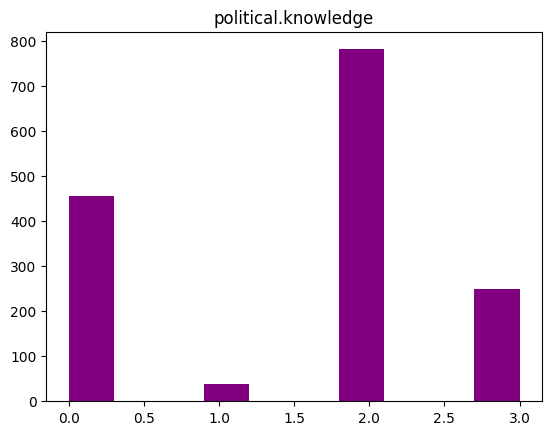

Skewness for political.knowledge:-0.427


In [15]:
##
## we are checking the skewness for only the numerical values

election1_columns = election1.select_dtypes(include = ['number'])

for feature_name in election1_columns:
    plt.hist(election1[feature_name], color = 'purple')
    plt.title(feature_name)
    plt.show()
    print("Skewness for " + feature_name + ":" + str(round(election1[feature_name].skew(), 3)))


##age is Slightly skewed to the right
##economic.cond.national is Slightly skewed to the left
##economic.cond.household is Slightly skewed to the left
##Blair	is Heavily skewed to the left
##Hague	is Slightly skewed to the right
##Europe is Slightly skewed to the left
##political.knowledge is Heavily skewed to the left


##1.2

Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.


In [16]:
##
## shape of the dataframe

election1.shape

(1525, 9)

In [17]:
##
## size of the dataframe

election1.size

13725

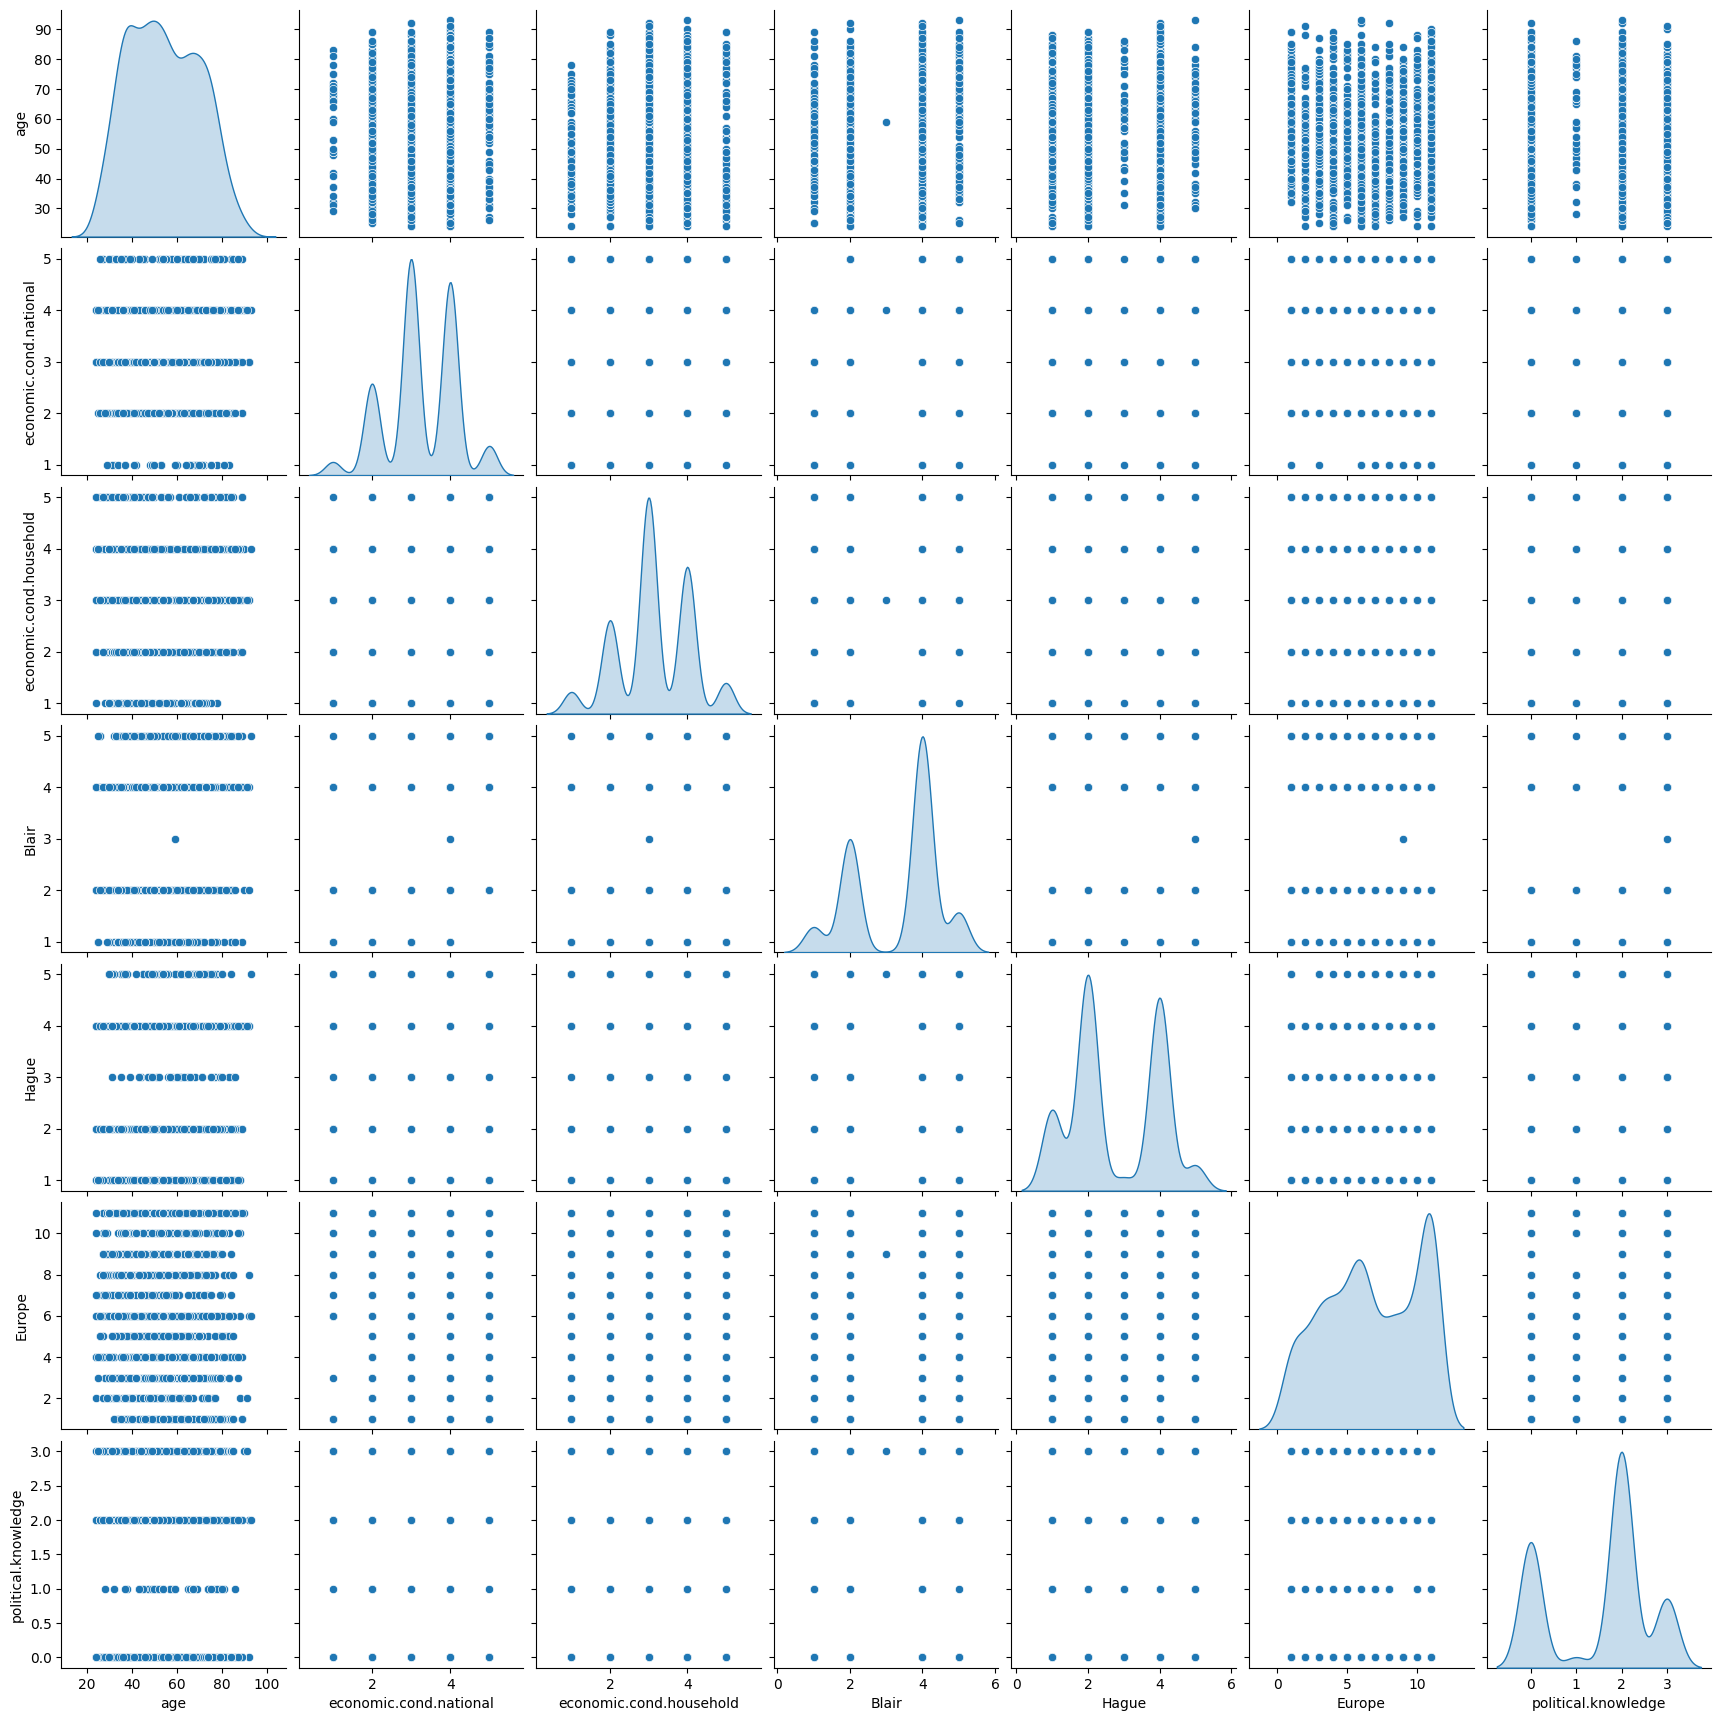

In [18]:
##
## pairplot for the whole dataset
## the pairplot

sns.pairplot(data = election1, diag_kind = 'kde')
plt.show()


<ipython-input-19-25f2306a3c07>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = election1.corr(), annot = True, cmap = 'Purples')


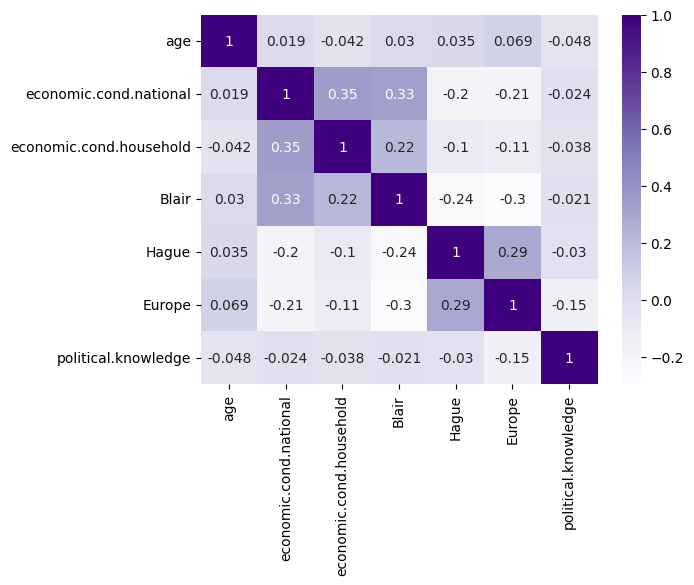

In [19]:
##
## Heatmap for the whole dataset
## There is very minimal relations between the features, the max is between economic condition national and *_*
## economic condition household at 0.35

sns.heatmap(data = election1.corr(), annot = True, cmap = 'Purples')
plt.show()


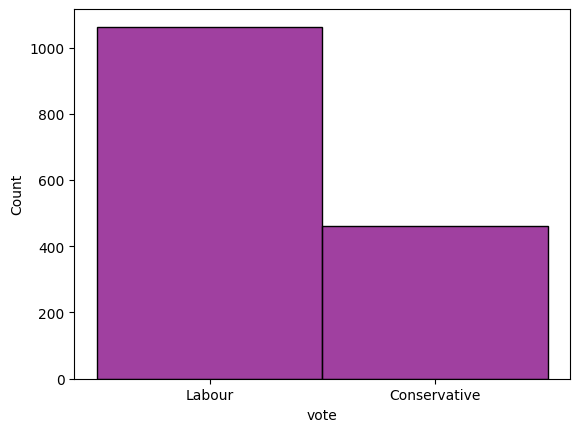

In [20]:
##
##

sns.histplot(data = election1, x = 'vote', color = 'purple')
plt.show()


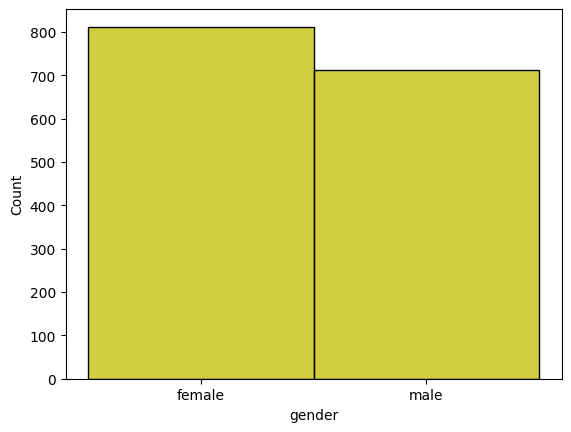

In [21]:
##
##

sns.histplot(data = election1, x = 'gender', color = 'y')
plt.show()


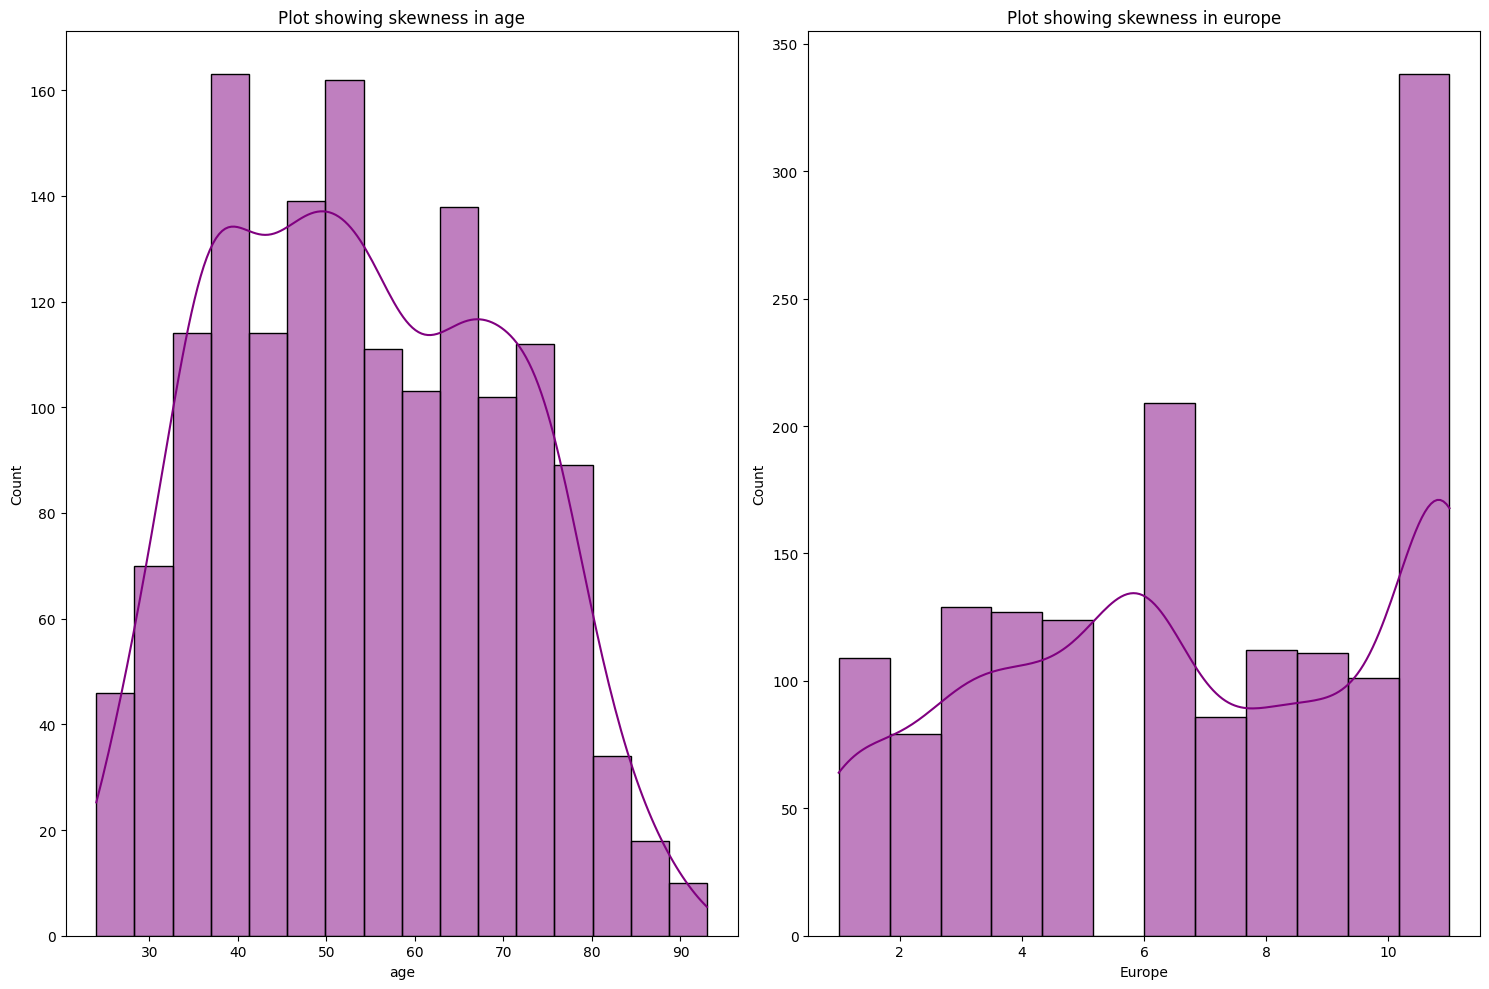

In [22]:
##
##

plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
sns.histplot(data = election1, x = 'age', kde = True, color = 'purple')
plt.title("Plot showing skewness in age")
plt.subplot(1, 2, 2)
sns.histplot(data = election1, x = 'Europe', kde = True, color = 'purple')
plt.title("Plot showing skewness in europe")

plt.tight_layout()
plt.show()

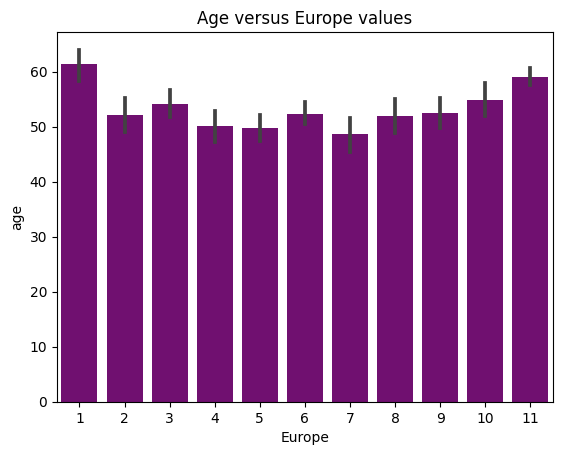

In [23]:
##
## Agr against Europe

sns.barplot(data = election1, x = 'Europe', y = 'age', color = 'purple')
plt.title("Age versus Europe values")
plt.show()


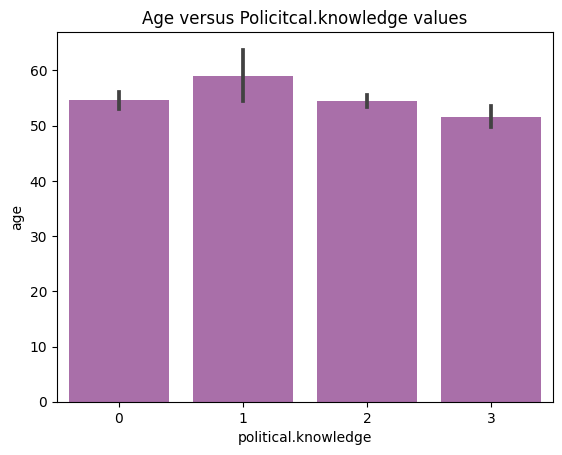

In [24]:
##
##

sns.barplot(data = election1, x = 'political.knowledge', y = 'age', color = 'purple', alpha = 0.6)
plt.title("Age versus Policitcal.knowledge values")
plt.show()

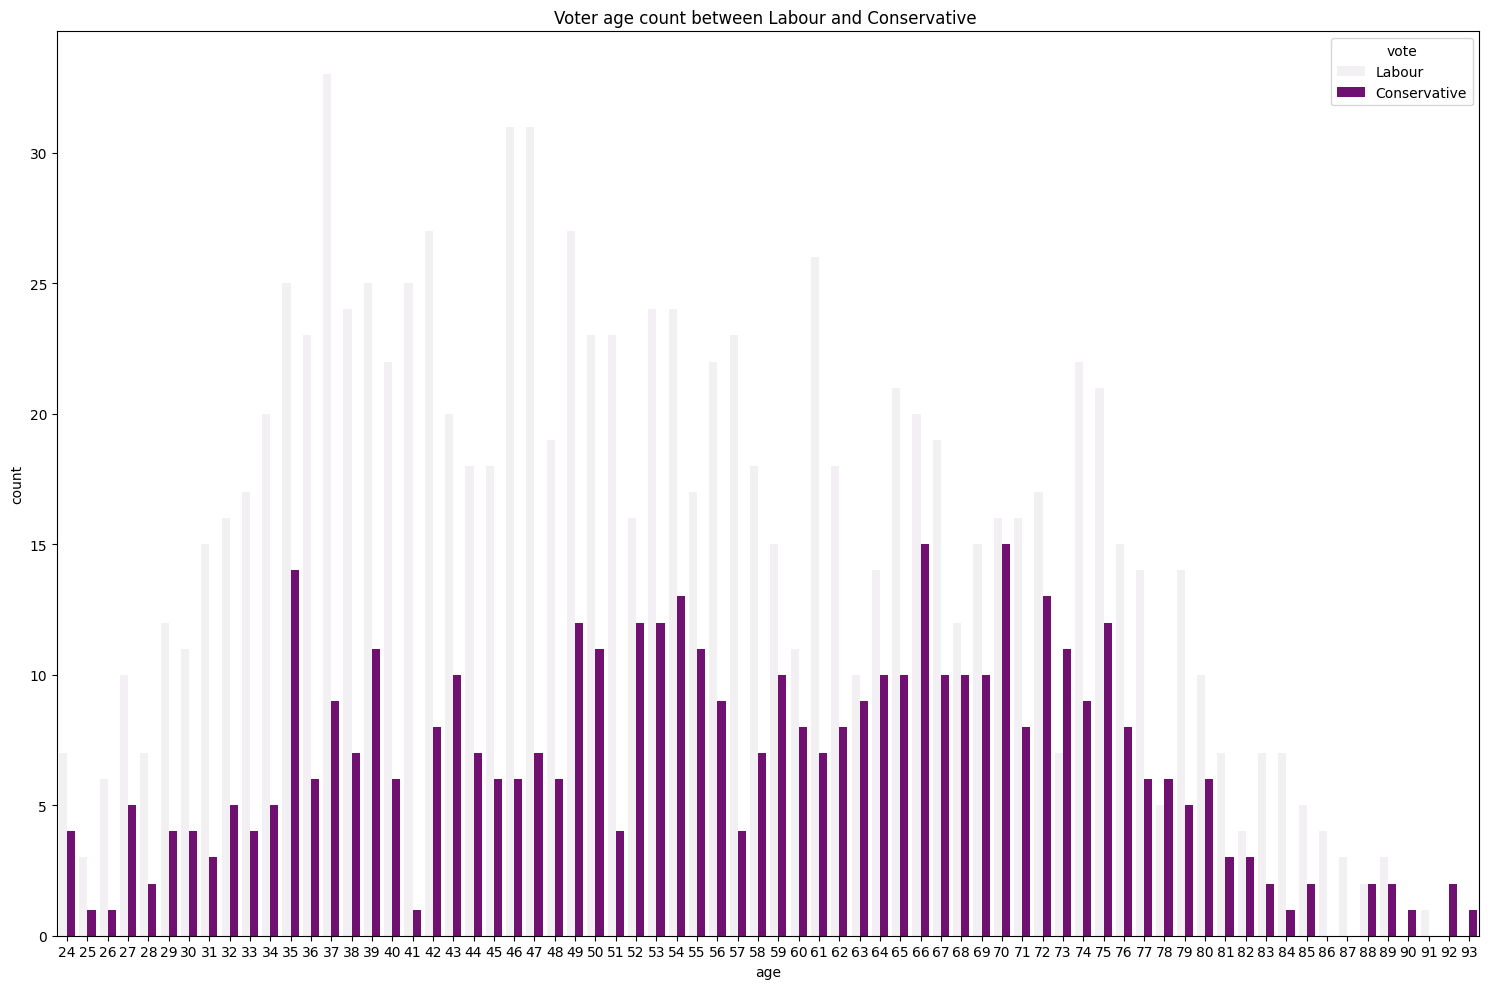

In [25]:
##
##

plt.figure(figsize = (15, 10))

sns.countplot(data = election1, x = 'age', hue = 'vote', color = 'purple')
plt.title("Voter age count between Labour and Conservative ")


plt.tight_layout()
plt.show()

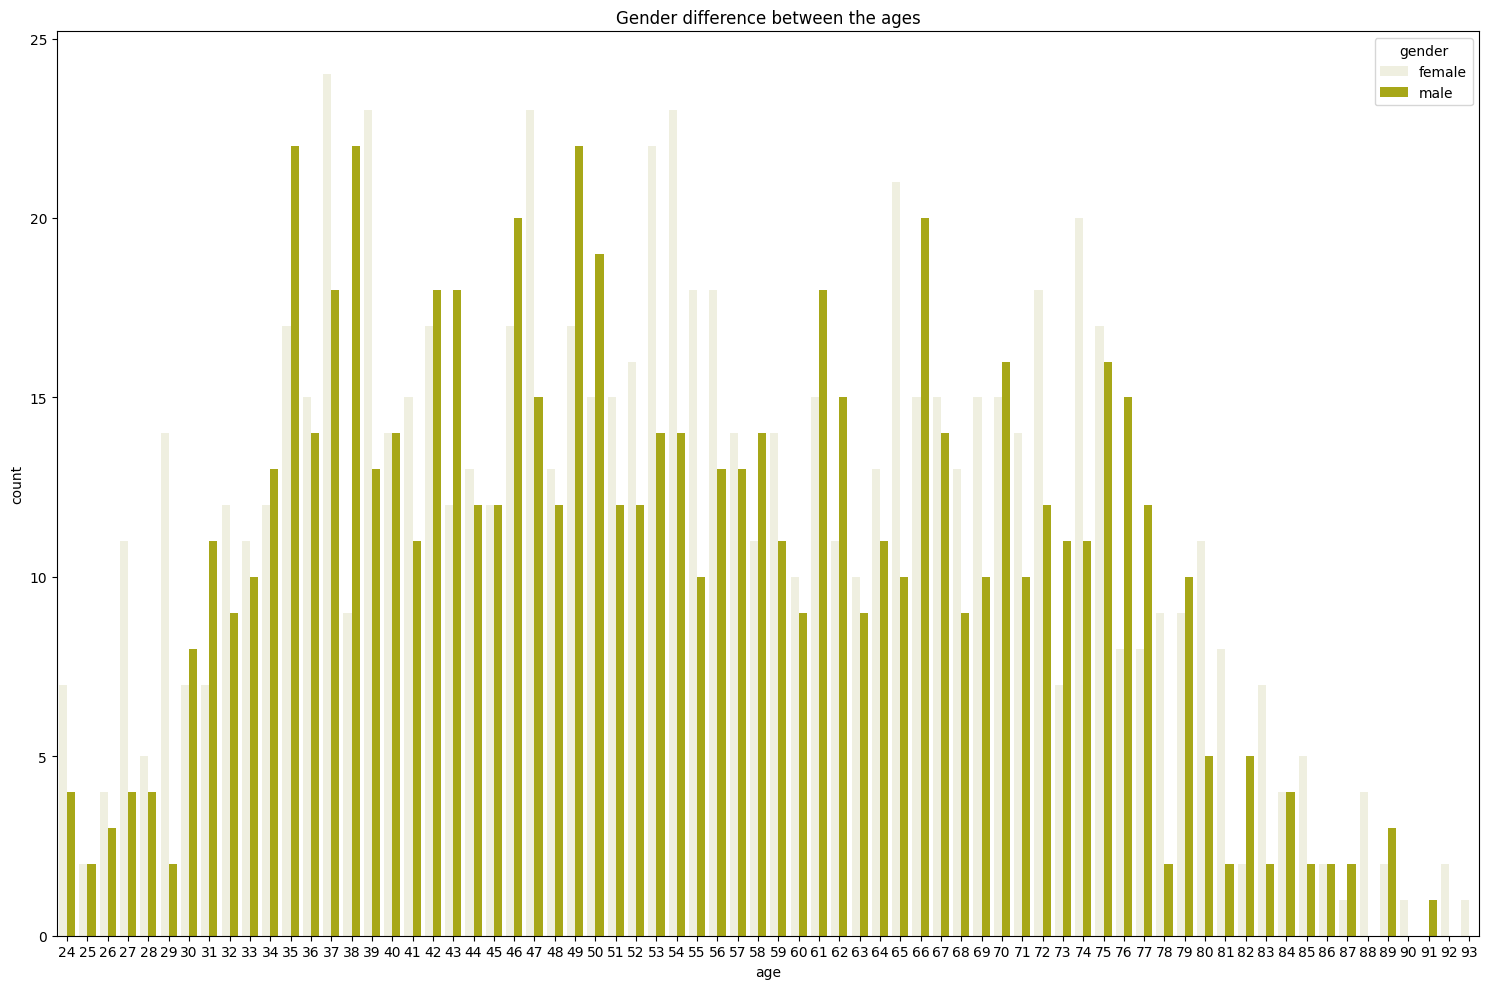

In [26]:
##
##

plt.figure(figsize = (15, 10))

sns.countplot(data = election1, x = 'age', hue = 'gender', color = 'y')
plt.title("Gender difference between the ages")

plt.tight_layout()
plt.show()


In [27]:
##
##

election1['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

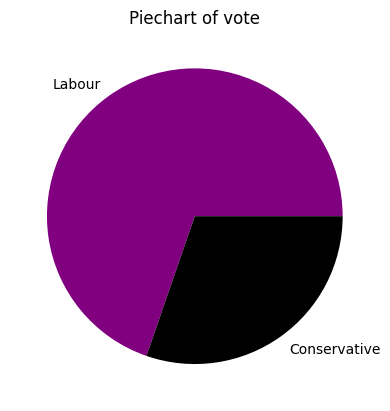

In [28]:
##
## pie chart for the vote values given

plt.pie(election1['vote'].value_counts(), labels = ['Labour', 'Conservative'], colors = ['purple', 'black'])
plt.title("Piechart of vote")
plt.show()



In [29]:
##
##

election1['gender'].value_counts()


female    812
male      713
Name: gender, dtype: int64

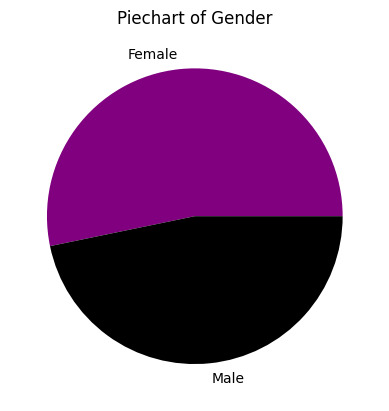

In [30]:
##
## pie chart for the vote values given

plt.pie(election1['gender'].value_counts(), labels = ['Female', 'Male'], colors = ['purple', 'black'])
plt.title("Piechart of Gender")
plt.show()


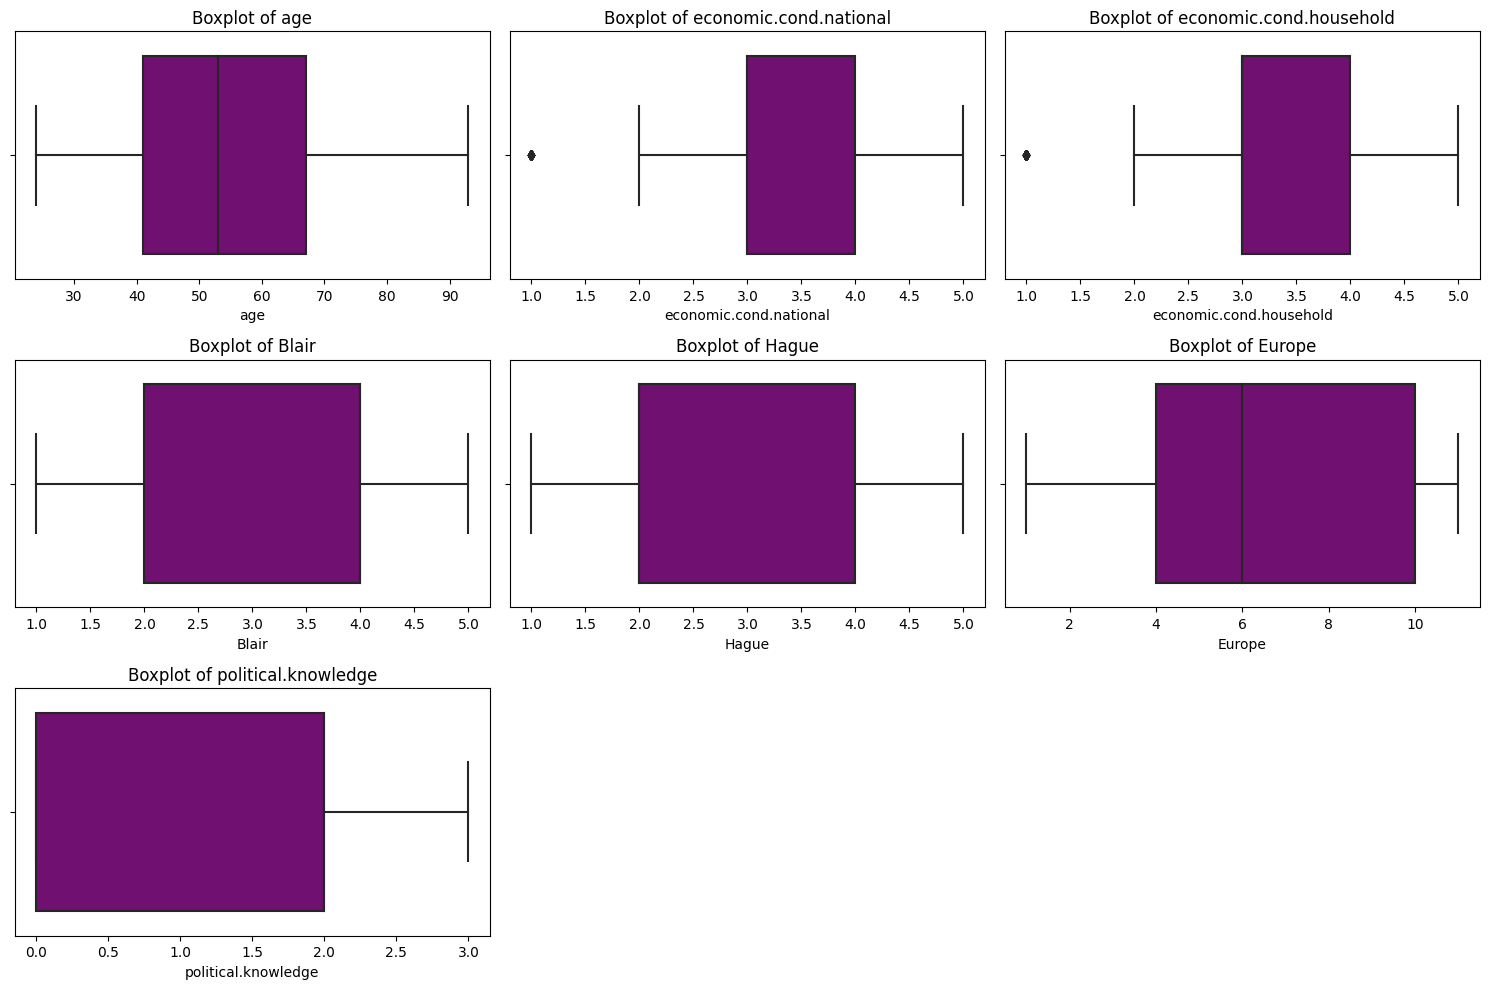

In [31]:
##
## boxplots to see if there are any outliers, ideally there should not be any.

numeric_df = election1.select_dtypes(include=['int'])

plt.figure(figsize=(15, 10))

# Loop through numerical columns only
for i, col in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x = numeric_df[col], color = 'purple')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


## it seems like only the economic condition national and household have outliers, they point to the value 1.0 *_*
## This means that the value are so packed between 3 and 5.

## see the value counts result which stays true to what we have seen

In [32]:
##
##

print("Value counts for econ.cond.household")
print(election1['economic.cond.household'].value_counts())
print("\n")
print("Value counts for econ.cond.national")
print(election1['economic.cond.national'].value_counts())




Value counts for econ.cond.household
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Value counts for econ.cond.national
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


In [33]:
##
## checking to see if all the values from economic condition household and economic condition national are the same

are_equal = (election1['economic.cond.household'] == election1['economic.cond.national']).all()
are_equal

False

##1.3

Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [34]:
##
## we have only two features that are categorical hence we will encode them.
## both of them have only two categories, hence we can encode them by setting them up individually.


election1.head()

vote  age  economic.cond.national  economic.cond.household  \
Unnamed: 0                                                                 
1           Labour   43                       3                        3   
2           Labour   36                       4                        4   
3           Labour   35                       4                        4   
4           Labour   24                       4                        2   
5           Labour   41                       2                        2   

            Blair  Hague  Europe  political.knowledge  gender  
Unnamed: 0                                                     
1               4      1       2                    2  female  
2               4      4       5                    2    male  
3               5      2       3                    2    male  
4               2      1       4                    0  female  
5               1      1       6                    2    male

In [35]:
##
## we will set labour to be 0, and conservative to be 1
## likewise we will set male to be 0 and female to be 1

election1['vote'] = pd.Categorical(election1['vote']).codes
election1['gender'] = pd.Categorical(election1['gender']).codes
election1.head()


vote  age  economic.cond.national  economic.cond.household  Blair  \
Unnamed: 0                                                                      
1              1   43                       3                        3      4   
2              1   36                       4                        4      4   
3              1   35                       4                        4      5   
4              1   24                       4                        2      2   
5              1   41                       2                        2      1   

            Hague  Europe  political.knowledge  gender  
Unnamed: 0                                              
1               1       2                    2       0  
2               4       5                    2       1  
3               2       3                    2       1  
4               1       4                    0       0  
5               1       6                    2       1

In [36]:
##
## is scaling requried??
## scaling is requried whenever we are working with distance based models. Scaling is paramount.
## for the dataset that we have here, scaling is required as we have age in a larger scale compared to other features.


## the thing to note is that the differences are not huge, they are considerable near. it would be interesting to see *_*
## how the propsed model performs for both kinds of data.

election1.describe().T

## we can see that mean and standard deviations are comparatively closer with single digit differences, only age is the odd one with doublt digit values
## jsut from this alone we can scale as it would be an improvement over a model that is trained without, but the difference in terms of performance *_*
## could not be easily determined at this point of time.

count       mean        std   min   25%   50%   75%  \
vote                     1525.0   0.697049   0.459685   0.0   0.0   1.0   1.0   
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   
gender                   1525.0   0.467541   0.499109   0.0   0.0   0.0   1.0   

                          max  
vote                      1.0  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0  
gender                    1.0

In [37]:
##
## let's create separate data, one scaled and one not scaled. before that lets see the variances

election1.var()


vote                         0.211310
age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
gender                       0.249110
dtype: float64

In [38]:
##
##

election1 = pd.DataFrame.drop_duplicates(election1)


In [39]:
##
## now let' use min-max scaling on all the available features

from sklearn import preprocessing

## setting the model
min_max_scaler = preprocessing.MinMaxScaler()

## transforming the requried data
election1_scaled = min_max_scaler.fit_transform(election1)
election1_scaled = pd.DataFrame(election1_scaled, columns = election1.columns)


## looking at the data
election1_scaled.head(10)

vote       age  economic.cond.national  economic.cond.household  Blair  \
0   1.0  0.275362                    0.50                     0.50   0.75   
1   1.0  0.173913                    0.75                     0.75   0.75   
2   1.0  0.159420                    0.75                     0.75   1.00   
3   1.0  0.000000                    0.75                     0.25   0.25   
4   1.0  0.246377                    0.25                     0.25   0.00   
5   1.0  0.333333                    0.50                     0.75   0.75   
6   1.0  0.478261                    0.25                     0.25   0.75   
7   1.0  0.768116                    0.50                     0.75   0.75   
8   1.0  0.217391                    0.50                     0.50   0.75   
9   1.0  0.666667                    0.50                     0.25   1.00   

   Hague  Europe  political.knowledge  gender  
0   0.00     0.1             0.666667     0.0  
1   0.75     0.4             0.666667     1.0  
2   0.25     0.2             0.666667     1.0  
3   0.00     0.3             0.000000     0.0  
4   0.00     0.5             0.666667     1.0  
5   0.75     0.3             0.666667     1.0  
6   0.75     1.0             0.666667     1.0  
7   0.00     0.0             0.000000     1.0  
8   0.75     1.0             0.000000     0.0  
9   0.00     1.0             0.666667     1.0

In [40]:
##
##

election1_scaled.describe().T


## after scaling we can see that the data is much more consistent and this would enable a better model
## best referenc is the mean of age is very close to the other features


count      mean       std  min       25%       50%  \
vote                     1517.0  0.696770  0.459805  0.0  0.000000  1.000000   
age                      1517.0  0.438279  0.227561  0.0  0.246377  0.420290   
economic.cond.national   1517.0  0.561305  0.220448  0.0  0.500000  0.500000   
economic.cond.household  1517.0  0.534443  0.232767  0.0  0.500000  0.500000   
Blair                    1517.0  0.583883  0.293693  0.0  0.250000  0.750000   
Hague                    1517.0  0.437376  0.308120  0.0  0.250000  0.250000   
Europe                   1517.0  0.574028  0.329904  0.0  0.300000  0.500000   
political.knowledge      1517.0  0.513514  0.361472  0.0  0.000000  0.666667   
gender                   1517.0  0.467370  0.499099  0.0  0.000000  0.000000   

                              75%  max  
vote                     1.000000  1.0  
age                      0.623188  1.0  
economic.cond.national   0.750000  1.0  
economic.cond.household  0.750000  1.0  
Blair                    0.750000  1.0  
Hague                    0.750000  1.0  
Europe                   0.900000  1.0  
political.knowledge      0.666667  1.0  
gender                   1.000000  1.0

In [41]:
##
## now lets split the data in 70:30 ration, with random state as 42
## this is for the non-scaled data

from sklearn import model_selection

X1 = election1.drop(['vote'], axis = 1)
y1 = election1['vote'].copy()

X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size = 0.30, random_state = 42, stratify = y1)



In [42]:
##
## The reason for stratification is because we do not have a equal or similar distribution of the target variable categories

print(y1_train.value_counts())
print(y1_test.value_counts())


1    739
0    322
Name: vote, dtype: int64
1    318
0    138
Name: vote, dtype: int64


In [43]:
##
## now lets split the data in 70:30 ration, with random state as 42
## this is for the scaled data

from sklearn import model_selection

X2 = election1_scaled.drop(['vote'], axis = 1)
y2 = election1_scaled['vote'].copy()

X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size = 0.30, random_state = 42, stratify = y2)



In [44]:
##
## The reason for stratification is because we do not have a equal or similar distribution of the target variable categories

print(y2_train.value_counts())
print(y2_test.value_counts())


1.0    739
0.0    322
Name: vote, dtype: int64
1.0    318
0.0    138
Name: vote, dtype: int64


##1.4 and 1.7 - Logistic regression and LDA alone

Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [45]:
##
##

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay




#### logistic regression with no penalty on the non scaled data


In [46]:
##
## performing Logistic Regression on the non-scaled model

model = LogisticRegression(max_iter = 10000, penalty = None)

model.fit(X1_train, y1_train)


##prediction on the train and test dataset
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)




In [47]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.02073135,  0.39682577,  0.10848947,  0.60205149, -0.77261436,
        -0.23741357, -0.38423837,  0.00471292]])

In [48]:
##
## lets see the scores for the train dataframe

model.score(X1_train, y1_train)


0.8369462770970783

AUC: 0.885


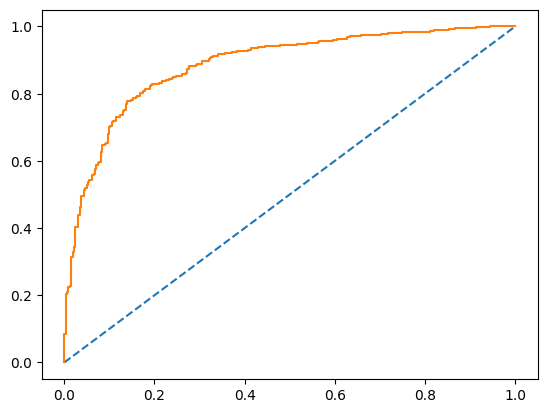

In [49]:
##
##
## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [50]:
##
##
## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))



True Negative - 213
False Positive - 109
False Negative - 64
True Positve - 675


In [51]:
##
##
## classification report

print(classification_report(y1_train, y1_train_predict))


              precision    recall  f1-score   support

           0       0.77      0.66      0.71       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [52]:
##
##
## iterations count

model.n_iter_, model.tol, model.max_iter


(array([118], dtype=int32), 0.0001, 10000)

In [53]:
##
## lets see the scores for the test dataframe

model.score(X1_test, y1_test)


0.8377192982456141

AUC: 0.897


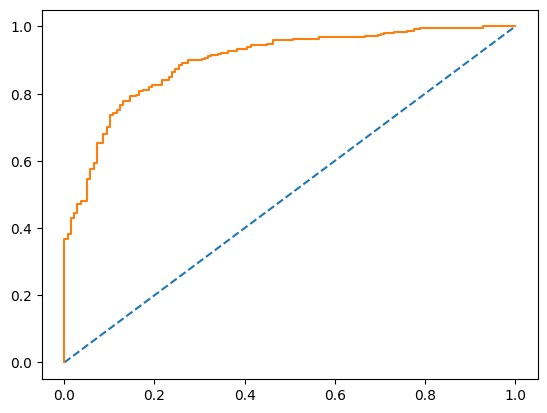

In [54]:
##
##
## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [55]:
##
##
## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))



True Negative - 91
False Positive - 47
False Negative - 27
True Positve - 291


In [56]:
##
##
## classification report

print(classification_report(y1_test, y1_test_predict))


              precision    recall  f1-score   support

           0       0.77      0.66      0.71       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [57]:
##
##
## iterations count

model.n_iter_, model.tol, model.max_iter


(array([118], dtype=int32), 0.0001, 10000)

#### logistic regression with no penalty on the scaled data - model referenced for Business report for q1.4

In [58]:
##
## performing Logistic Regression on the scaled model

model = LogisticRegression(max_iter = 10000, penalty = None)

model.fit(X2_train, y2_train)


##prediction on the train and test dataset
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




In [59]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.43098256,  1.58705413,  0.43513121,  2.40813807, -3.08961332,
        -2.37502606, -1.15256145,  0.00377594]])

In [60]:
##
## lets see the scores for the train dataframe

model.score(X2_train, y2_train)


0.8369462770970783

AUC: 0.885


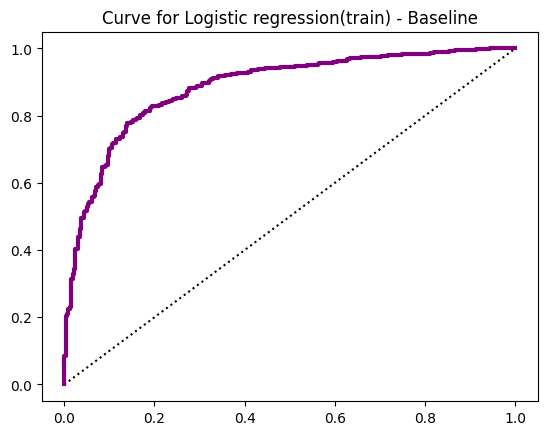

In [61]:
##
##
## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, color = 'purple', linewidth = 3)
plt.title('Curve for Logistic regression(train) - Baseline')
plt.show()

In [62]:
##
##
## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))



True Negative - 213
False Positive - 109
False Negative - 64
True Positve - 675


In [63]:
##
##
## classification report

print(classification_report(y2_train, y2_train_predict))


              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       322
         1.0       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [64]:
##
##
## iterations count

model.n_iter_, model.tol, model.max_iter


(array([21], dtype=int32), 0.0001, 10000)

In [65]:
##
## lets see the scores for the test dataframe

model.score(X2_test, y2_test)


0.8377192982456141

AUC: 0.897


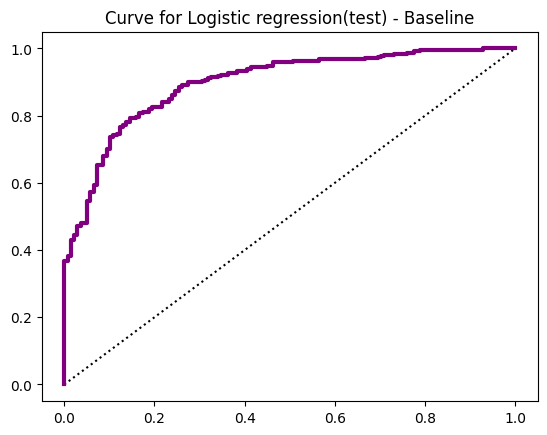

In [66]:
##
##
## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, color = 'purple', linewidth = 3)
plt.title("Curve for Logistic regression(test) - Baseline")
plt.show()

In [67]:
##
##
## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))



True Negative - 91
False Positive - 47
False Negative - 27
True Positve - 291


In [68]:
##
##
## classification report

print(classification_report(y2_test, y2_test_predict))


              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [69]:
##
##
## iterations count

model.n_iter_, model.tol, model.max_iter


(array([21], dtype=int32), 0.0001, 10000)

#### logistic regression with ridge penalty on the non scaled data

In [70]:
##
##
## logistic regression using ridge penatly on the non-scaled model

model = LogisticRegression(max_iter = 10000, penalty = 'l2')

model.fit(X1_train, y1_train)


##prediction on the train and test dataset
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)


In [71]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.02067732,  0.39319253,  0.10936728,  0.59863114, -0.76742334,
        -0.23716185, -0.38092235,  0.00328276]])

0.8369462770970783
AUC: 0.885


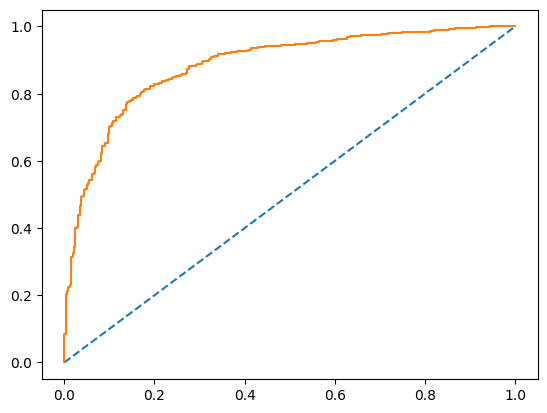

True Negative - 213
False Positive - 109
False Negative - 64
True Positve - 675
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061

[127] 0.0001 10000


In [72]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)



0.8399122807017544
AUC: 0.897


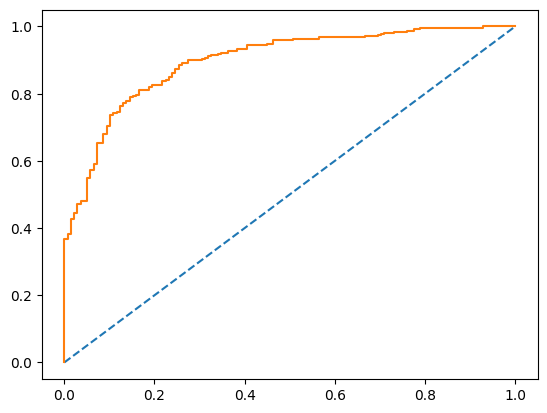

True Negative - 91
False Positive - 47
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456

[127] 0.0001 10000


In [73]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)


#### logistic regression with ridge penalty on the scaled data

In [74]:
##
##
## logistic regression using ridge penatly on the scaled model

model = LogisticRegression(max_iter = 10000, penalty = 'l2')

model.fit(X2_train, y2_train)


##prediction on the train and test dataset
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)


In [75]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.21041165,  1.39069943,  0.47538479,  2.21521193, -2.81283134,
        -2.19397588, -1.04439337,  0.00326035]])

0.8360037700282752
AUC: 0.885


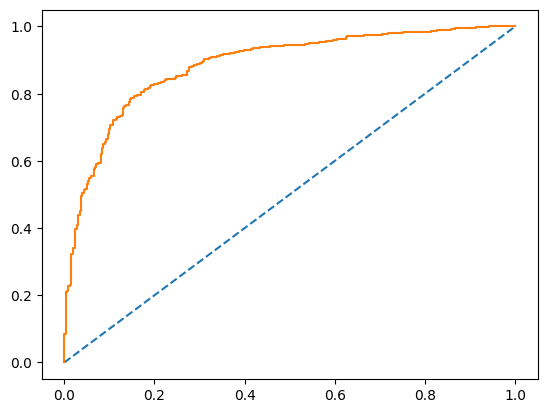

True Negative - 210
False Positive - 112
False Negative - 62
True Positve - 677
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       322
         1.0       0.86      0.92      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.83      0.84      0.83      1061

[22] 0.0001 10000


In [76]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)



0.8355263157894737
AUC: 0.896


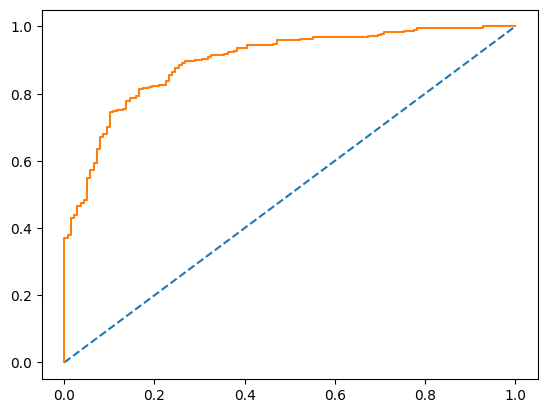

True Negative - 89
False Positive - 49
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456

[22] 0.0001 10000


In [77]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)


#### logistic regression with lasso penalty on the non scaled data

In [78]:
##
##
## logistic regression using lasso penatly on the non-scaled model

model = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'saga')

model.fit(X1_train, y1_train)


##prediction on the train and test dataset
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)


In [79]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.01238624,  0.49483859,  0.1979374 ,  0.64297166, -0.67943093,
        -0.20516976, -0.30836301,  0.0010299 ]])

0.8265786993402451
AUC: 0.884


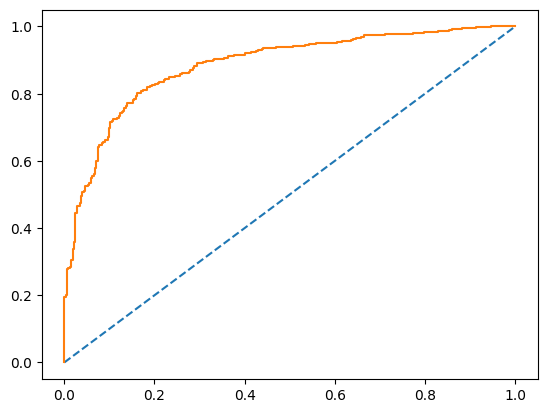

True Negative - 208
False Positive - 114
False Negative - 70
True Positve - 669
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061

[855] 0.0001 10000


In [80]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)



0.8464912280701754
AUC: 0.893


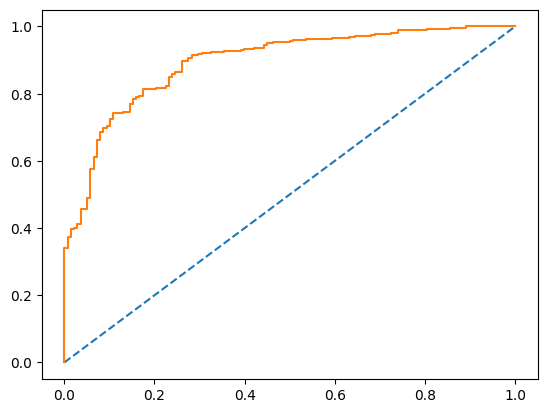

True Negative - 93
False Positive - 45
False Negative - 25
True Positve - 293
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       138
           1       0.87      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.85      0.84       456

[855] 0.0001 10000


In [81]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)


#### logistic regression with lasso penalty on the scaled data

In [82]:
##
##
## logistic regression using lasso penatly on the scaled model

model = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'saga')

model.fit(X2_train, y2_train)


##prediction on the train and test dataset
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)


In [83]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.26589129,  1.46183986,  0.3570546 ,  2.33186426, -2.97919978,
        -2.28609455, -1.06790677,  0.        ]])

0.8369462770970783
AUC: 0.885


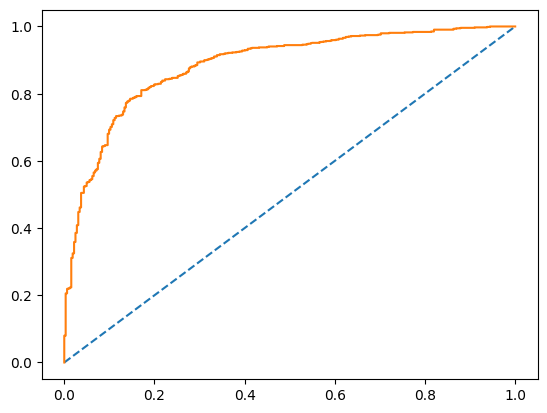

True Negative - 212
False Positive - 110
False Negative - 63
True Positve - 676
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       322
         1.0       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061

[18] 0.0001 10000


In [84]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)



0.8377192982456141
AUC: 0.897


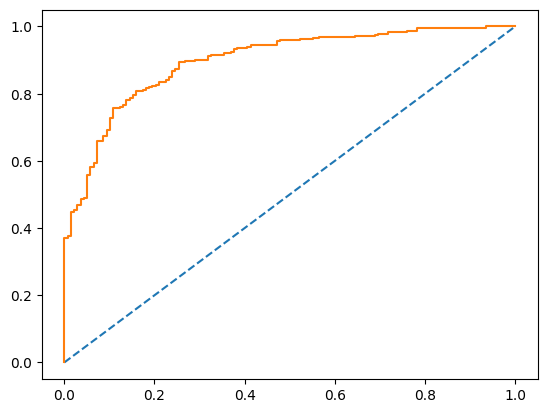

True Negative - 91
False Positive - 47
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456

[18] 0.0001 10000


In [85]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))


## iterations count

print(model.n_iter_, model.tol, model.max_iter)


#### LDA on the non scaled data

In [86]:
##
##
## now lets apply linear discriminant analysis on non-scaled dataframe

ldaclf = LinearDiscriminantAnalysis()
model = ldaclf.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

In [87]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.02512835,  0.39740661,  0.13025847,  0.73583871, -0.8743118 ,
        -0.25638312, -0.49389002, -0.03631575]])

0.8378887841658812
AUC: 0.885


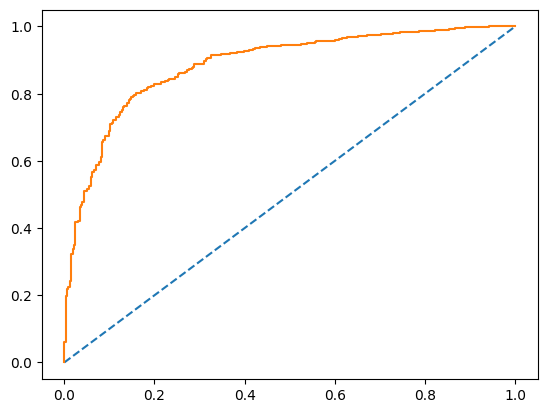

True Negative - 219
False Positive - 103
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [88]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8421052631578947
AUC: 0.896


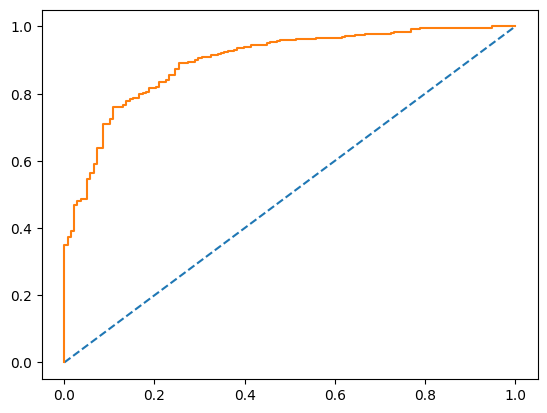

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       138
           1       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [89]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### LDA on the scaled data - model referenced for Business report q1.4

In [90]:
##
##
## now lets apply linear discriminant analysis on scaled dataframe

ldaclf = LinearDiscriminantAnalysis()
model = ldaclf.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)

In [91]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.73385609,  1.58962644,  0.52103386,  2.94335483, -3.4972472 ,
        -2.56383116, -1.48167005, -0.03631575]])

0.8378887841658812
AUC: 0.885


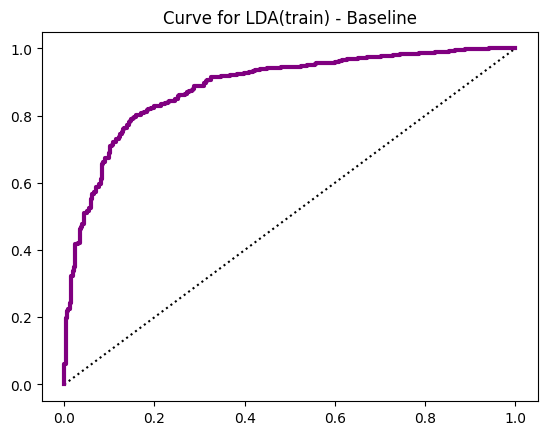

True Negative - 219
False Positive - 103
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       322
         1.0       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [92]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, color = 'purple', linewidth = 3)
plt.title("Curve for LDA(train) - Baseline")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8421052631578947
AUC: 0.896


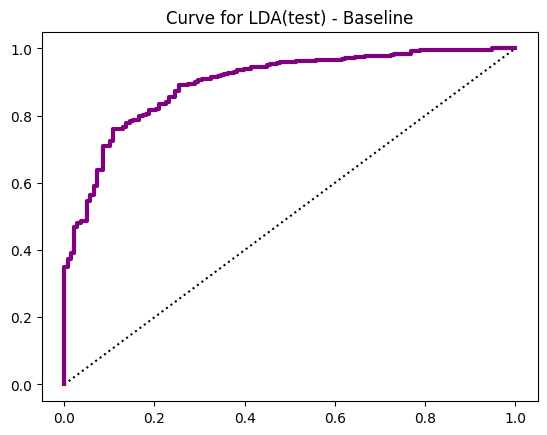

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       138
         1.0       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [93]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, color = 'purple', linewidth = 3)
plt.title("Curve for LDA(test) - Baseline")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



##1.5 and 1.7 - KNN and Naive Bayes model alone

Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [94]:
##
##

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#### Gaussian NB on the non-scaled data

In [95]:
##
##
## lets run Gaussian Naive Bayes theorem on the non-scaled model

model = GaussianNB()
model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)




0.824693685202639
AUC: 0.882


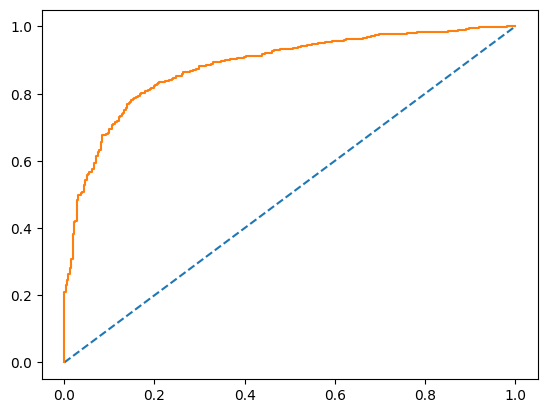

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       322
           1       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [96]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8442982456140351
AUC: 0.889


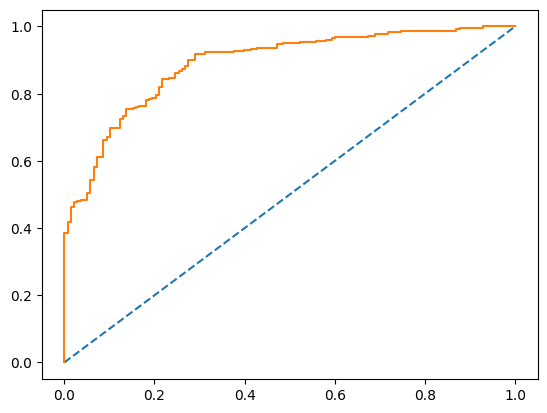

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       138
           1       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [97]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### Gaussian NB on the scaled data - model referenced for Business report q1.5

In [98]:
##
##
## lets run Gaussian Naive Bayes theorem on the scaled model

model = GaussianNB()
model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


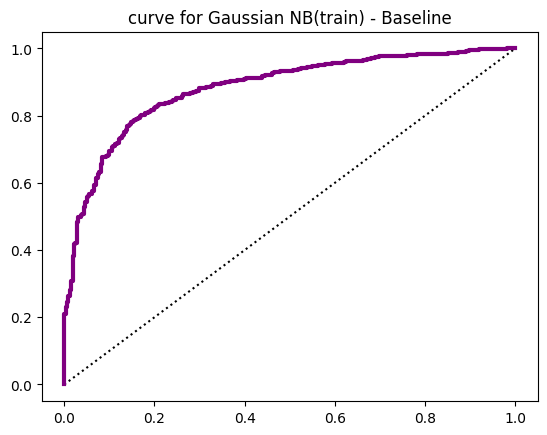

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [99]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, color = 'purple', linewidth = 3)
plt.title("curve for Gaussian NB(train) - Baseline")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


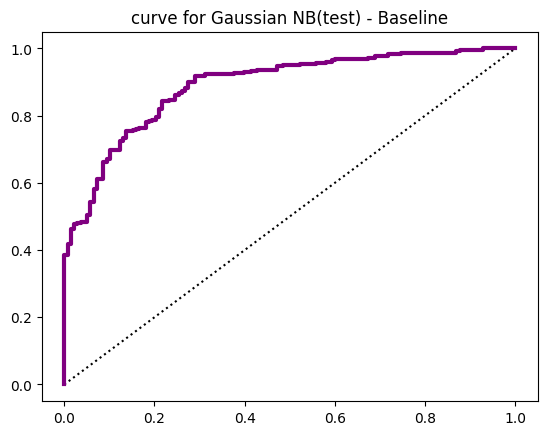

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [100]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle =  'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, color = 'purple', linewidth = 3)
plt.title("curve for Gaussian NB(test) - Baseline")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### KNN with default metric and n = 3 on the scaled data - model referenced for Business report q1.5, any of the scaled model can be used

In [101]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 3 and metric(distance base) is default

KNN_model = KNeighborsClassifier(n_neighbors = 3)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


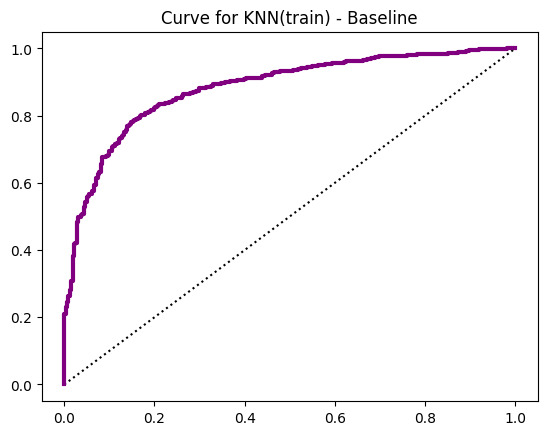

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [102]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for KNN(train) - Baseline')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


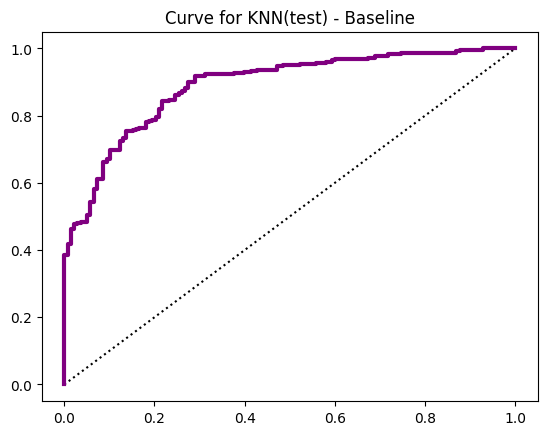

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [103]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle =  'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for KNN(test) - Baseline')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### KNN with euclidean metric and n = 3 on the non-scaled data

In [104]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 3 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)

KNN_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

0.6965127238454288
AUC: 0.500


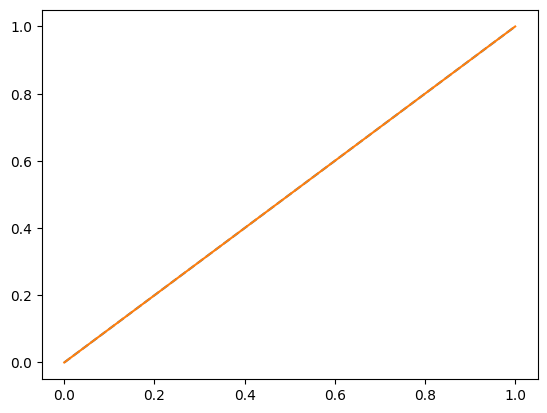

True Negative - 0
False Positive - 322
False Negative - 0
True Positve - 739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.6973684210526315
AUC: 0.500


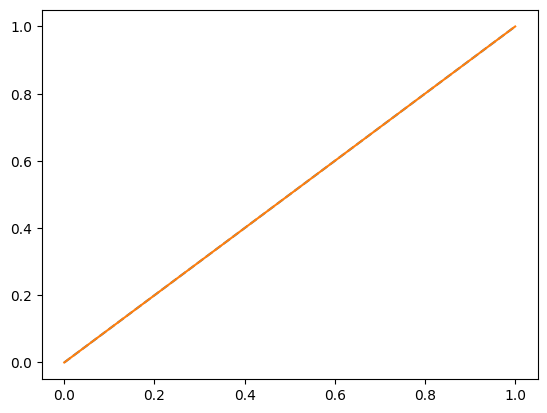

True Negative - 0
False Positive - 138
False Negative - 0
True Positve - 318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### KNN with euclidean metric and n = 3 on the scaled data

In [107]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 3 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


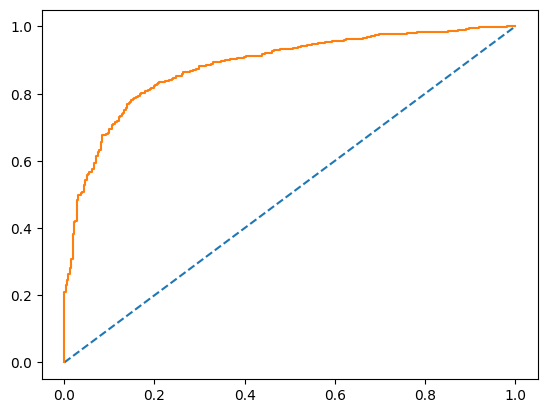

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [108]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


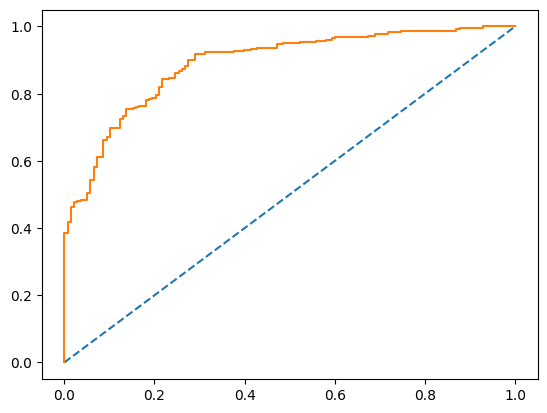

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [109]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### KNN with euclidean metric and n = 5 on the non-scaled data

In [110]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 5 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5)

KNN_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

0.6965127238454288
AUC: 0.500


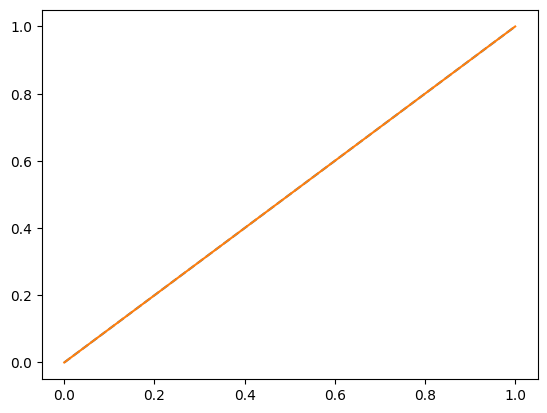

True Negative - 0
False Positive - 322
False Negative - 0
True Positve - 739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.6973684210526315
AUC: 0.500


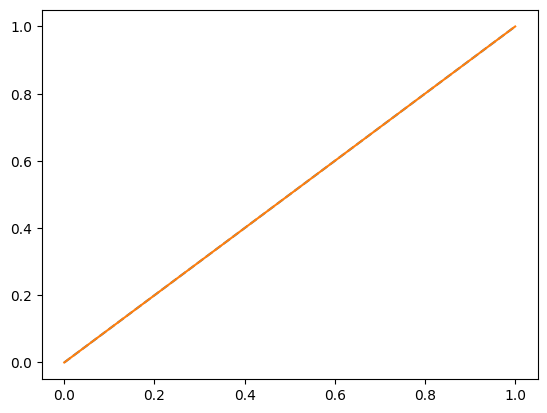

True Negative - 0
False Positive - 138
False Negative - 0
True Positve - 318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### KNN with euclidean metric and n = 5 on the scaled data

In [113]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 5 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


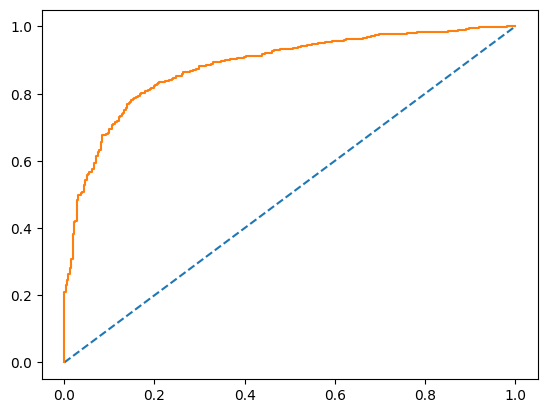

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [114]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


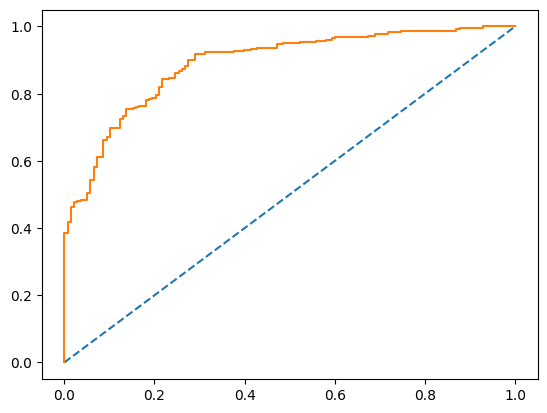

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [115]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### KNN with euclidean metric and n = 7 on the non-scaled data

In [116]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 7 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 7)

KNN_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

0.6965127238454288
AUC: 0.500


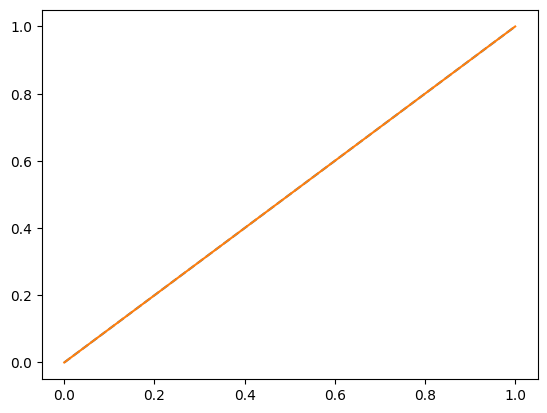

True Negative - 0
False Positive - 322
False Negative - 0
True Positve - 739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.6973684210526315
AUC: 0.500


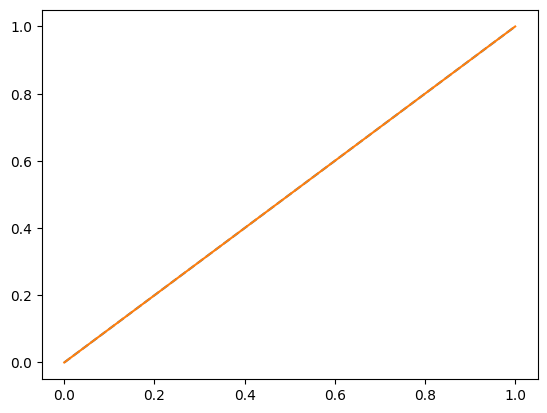

True Negative - 0
False Positive - 138
False Negative - 0
True Positve - 318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### KNN with euclidean metric and n = 7 on the scaled data

In [119]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 7 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 7)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


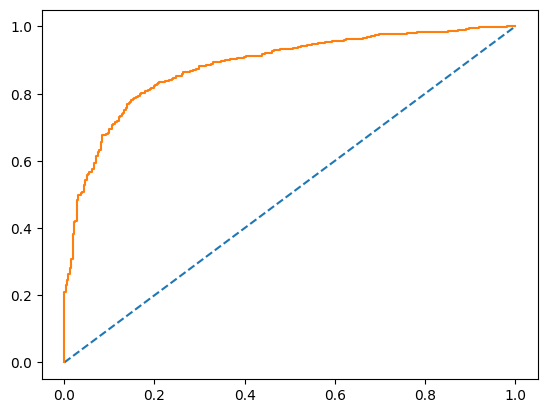

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [120]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


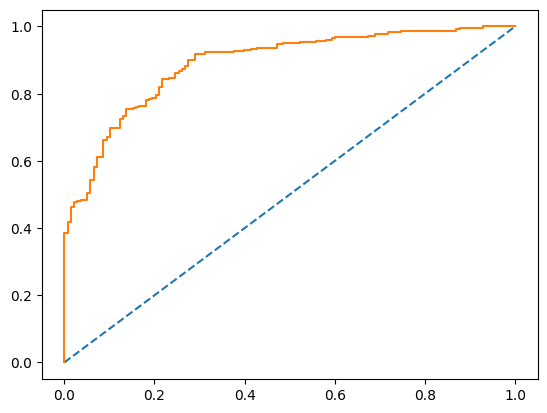

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [121]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### KNN with euclidean metric and n = 9 on the non-scaled data

In [122]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9)

KNN_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

0.6965127238454288
AUC: 0.500


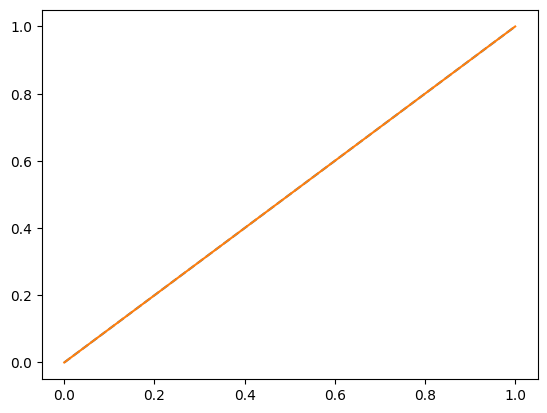

True Negative - 0
False Positive - 322
False Negative - 0
True Positve - 739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.6973684210526315
AUC: 0.500


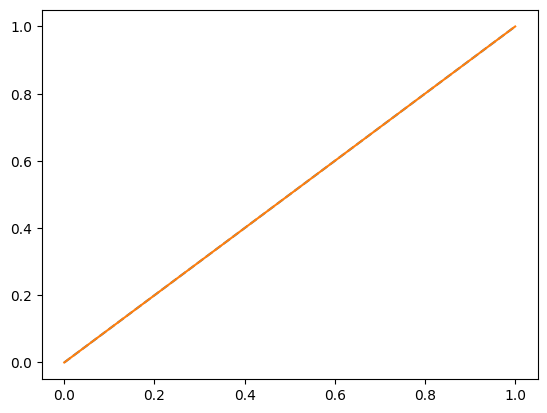

True Negative - 0
False Positive - 138
False Negative - 0
True Positve - 318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


#### KNN with euclidean metric and n = 9 on the scaled data

In [125]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


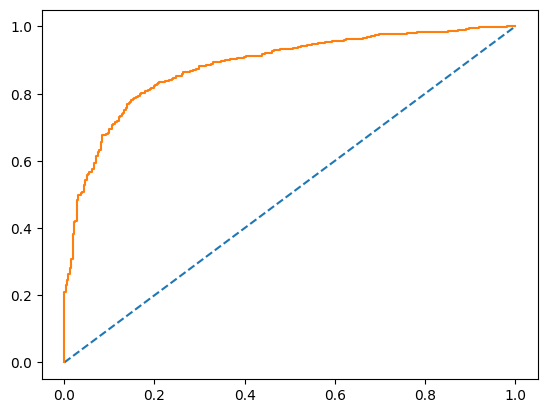

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [126]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


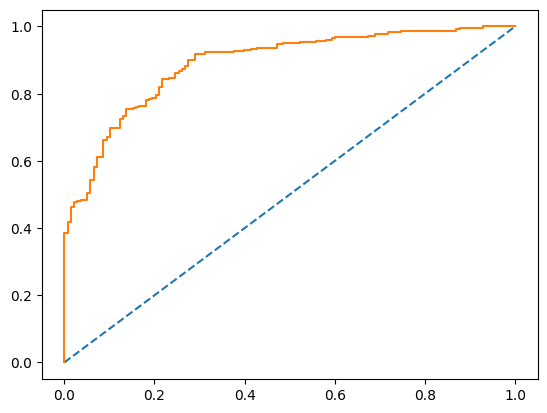

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [127]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Finding the optimal values for the KNN model

Misclassification error seems to follow the below situations

-- When k =1 the model has a misclassification error of 0.0, which suggests it's probably overfitting to the training data. A k value of 1 means the model is likely capturing noise and outliers, making it too sensitive to fluctuations in the training set.

-- Ask increases, the misclassification error generally seems to increase, peaking around k = 15 to k=19. This could indicate that the model is becoming too generalized and losing its ability to capture the underlying pattern as k increases.

-- After k=19, the misclassification error slightly drops and stabilizes around 0.1419 to 0.1462. This could indicate a "sweet spot" where the model is neither too sensitive (low k) nor too generalized (high k).

-- The lowest misclassification error after k=1 is around k=3 or k=5. These might be the best k values for this dataset, offering a good trade-off between bias and variance.

0.0
0.11404335532516496
0.14137606032045236
0.1564561734213007
0.15457115928369458
0.1602262016965127
0.16870876531573986
0.1677662582469368
0.1677662582469368
0.16965127238454292
0.17624882186616397
0.17907634307257303
0.17436380772855797
0.18284637134778514
0.18850141376060325


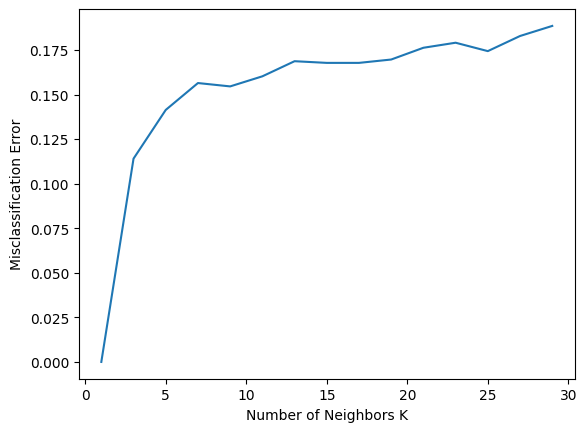

In [128]:
##
##
## lets try to find the optimal number of neighbors for KNN for the non-scaled data
## only train data

ac_scores = []

## a loop to increase neighbors until 30 and then storing the requried values
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1_train, y1_train)

    ## accuracy scores
    scores = knn.score(X1_train, y1_train)
    ac_scores.append(scores)


# changing to misclassification error
MCE = [1 - x for x in ac_scores]
for i in range(len(MCE)):
    print(MCE[i])


# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

0.0
0.11842105263157898
0.14254385964912286
0.15131578947368418
0.16447368421052633
0.16666666666666663
0.1842105263157895
0.1885964912280702
0.19956140350877194
0.19736842105263153
0.20175438596491224
0.19517543859649122
0.20614035087719296
0.19956140350877194
0.19956140350877194


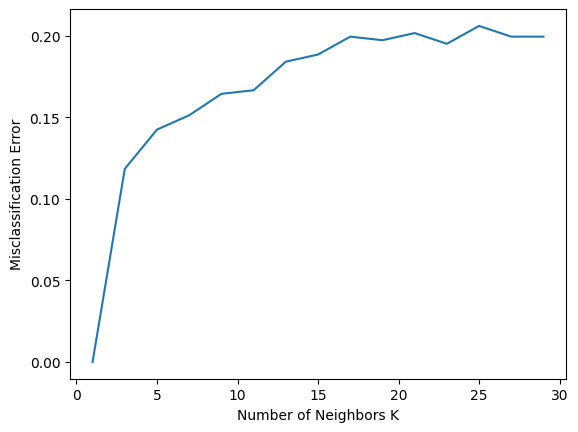

In [129]:
##
##
## lets try to find the optimal number of neighbors for KNN for the non-scaled data
## only test data

ac_scores = []

## a loop to increase neighbors until 30 and then storing the requried values
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1_test, y1_test)

    ## accuracy scores
    scores = knn.score(X1_test, y1_test)
    ac_scores.append(scores)


# changing to misclassification error
MCE = [1 - x for x in ac_scores]
for i in range(len(MCE)):
    print(MCE[i])


# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

0.0
0.12346842601319508
0.1404335532516494
0.14703110273327047
0.15551366635249764
0.1583411875589067
0.15739868049010364
0.16116870876531575
0.1621112158341188
0.16305372290292175
0.16305372290292175
0.16682375117813386
0.16682375117813386
0.16965127238454292
0.17059377945334586


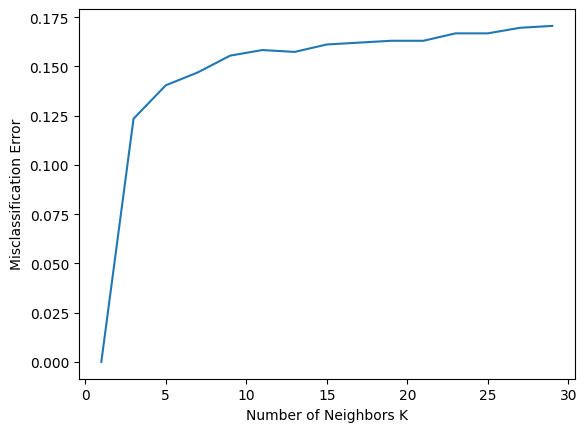

In [130]:
##
##
## lets try to find the optimal number of neighbors for KNN for the scaled data
## only train data

ac_scores = []

## a loop to increase neighbors until 30 and then storing the requried values
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X2_train, y2_train)

    ## accuracy scores
    scores = knn.score(X2_train, y2_train)
    ac_scores.append(scores)


# changing to misclassification error
MCE = [1 - x for x in ac_scores]
for i in range(len(MCE)):
    print(MCE[i])


# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

0.0
0.0964912280701754
0.10745614035087714
0.1228070175438597
0.125
0.13377192982456143
0.14254385964912286
0.13377192982456143
0.14035087719298245
0.14035087719298245
0.14473684210526316
0.14473684210526316
0.1600877192982456
0.1557017543859649
0.14692982456140347


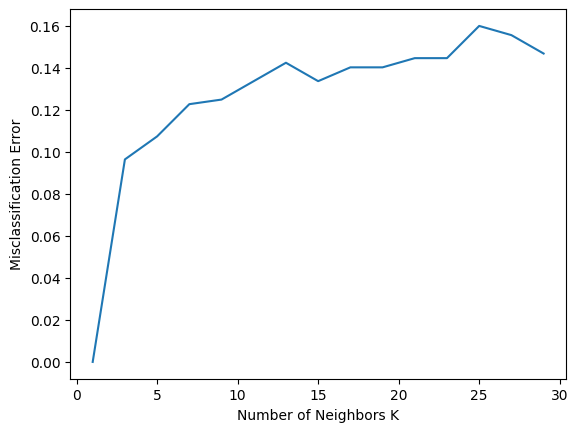

In [131]:
##
##
## lets try to find the optimal number of neighbors for KNN for the scaled data
## only test data

ac_scores = []

## a loop to increase neighbors until 30 and then storing the requried values
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X2_test, y2_test)

    ## accuracy scores
    scores = knn.score(X2_test, y2_test)
    ac_scores.append(scores)


# changing to misclassification error
MCE = [1 - x for x in ac_scores]
for i in range(len(MCE)):
    print(MCE[i])


# plot misclassification error vs k
plt.plot(range(1,30,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##1.6

Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

###Model tuning

##### Grid Search logistic regression on non-scaled data

In [132]:
##
## lets use grid_search to run different models and see which comes at the top
## none-scaled data is used here


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid = {
    'penalty': ['l2', None],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [10000],
    'tol': [0.001, 0.0001, 0.00001]
}

## creating the logistic regression model
logreg = LogisticRegression()

## grid_search setup
grid_search = GridSearchCV(logreg, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X1_train, y1_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






Best paramters: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}


In [133]:
##
##
## now lets apply logistic regression analysis on non-scaled dataframe

model = LogisticRegression(max_iter = 10000, penalty = 'l2', solver = 'newton-cg', tol = 0.001)
model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

In [134]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.02067366,  0.3931354 ,  0.10949137,  0.59865657, -0.76746131,
        -0.23716222, -0.38102825,  0.00341319]])

0.8369462770970783
AUC: 0.885


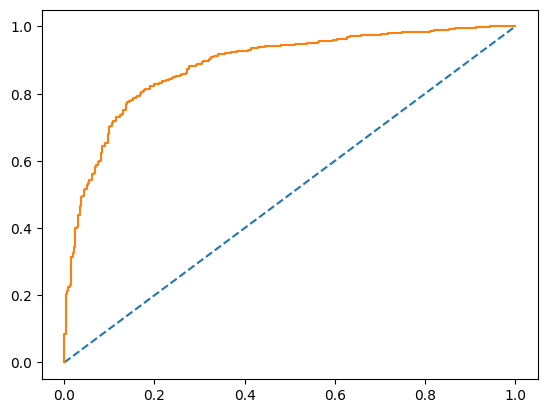

True Negative - 213
False Positive - 109
False Negative - 64
True Positve - 675
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [135]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8399122807017544
AUC: 0.897


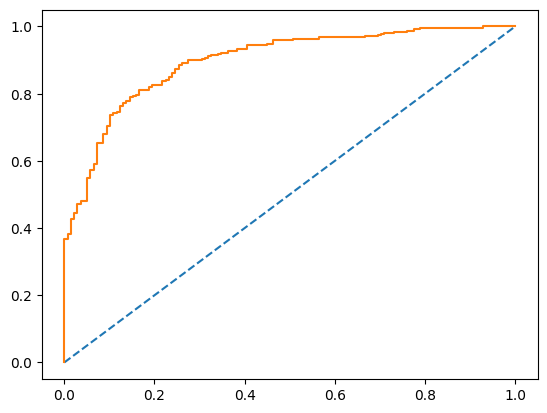

True Negative - 91
False Positive - 47
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [136]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



##### Grid Search logistic regression on scaled data - referenced in business report for q1.6

In [137]:
##
## lets use grid_search to run different models and see which comes at the top
## scaled data is used here


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [10000],
    'tol': [0.001, 0.0001, 0.00001]
}

## creating the logistic regression model
logreg = LogisticRegression()

## grid_search setup
grid_search = GridSearchCV(logreg, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X2_train, y2_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Best paramters: {'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001}


In [138]:
##
##
## now lets apply logistic regression analysis on scaled dataframe

model = LogisticRegression(C = 1, max_iter = 10000, penalty = 'l2', solver = 'newton-cg', tol = 0.001)
model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)

In [139]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.21035332,  1.39071567,  0.47540412,  2.21522474, -2.81283631,
        -2.19396878, -1.04437208,  0.00326353]])

0.8360037700282752
AUC: 0.885


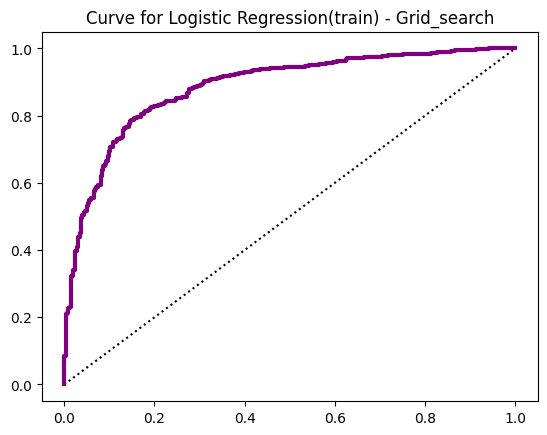

True Negative - 210
False Positive - 112
False Negative - 62
True Positve - 677
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       322
         1.0       0.86      0.92      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.78      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [140]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, color = 'purple', linewidth = 3)
plt.title('Curve for Logistic Regression(train) - Grid_search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8355263157894737
AUC: 0.896


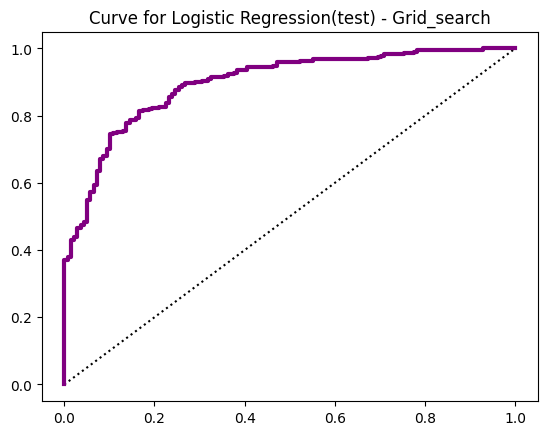

True Negative - 89
False Positive - 49
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.78      0.79       456
weighted avg       0.83      0.84      0.83       456



In [141]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, color = 'purple', linewidth = 3)
plt.title('Curve for Logistic Regression(test) - Grid_search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



##### Grid Search Linear Discriminant analysis on non-scaled data

In [142]:
##
## lets use grid_search to run different models and see which comes at the top
## none-scaled data is used here


from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## defining the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

## creating the logistic regression model
ldaclf = LinearDiscriminantAnalysis()

## grid_search setup
grid_search = GridSearchCV(ldaclf, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X1_train, y1_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






Best paramters: {'solver': 'svd'}


In [143]:
##
##
## now lets apply linear discriminant analysis on non-scaled dataframe

ldaclf = LinearDiscriminantAnalysis(solver = 'svd')
model = ldaclf.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

In [144]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-0.02512835,  0.39740661,  0.13025847,  0.73583871, -0.8743118 ,
        -0.25638312, -0.49389002, -0.03631575]])

0.8378887841658812
AUC: 0.885


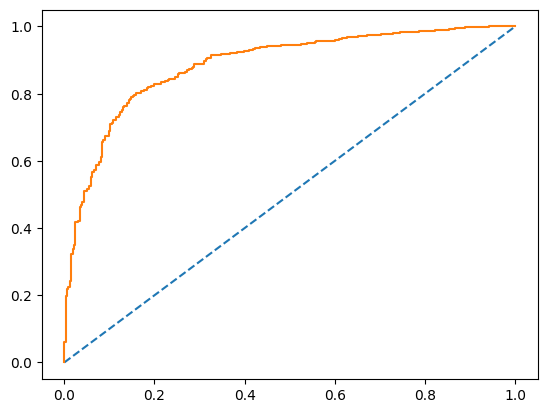

True Negative - 219
False Positive - 103
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [145]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8421052631578947
AUC: 0.896


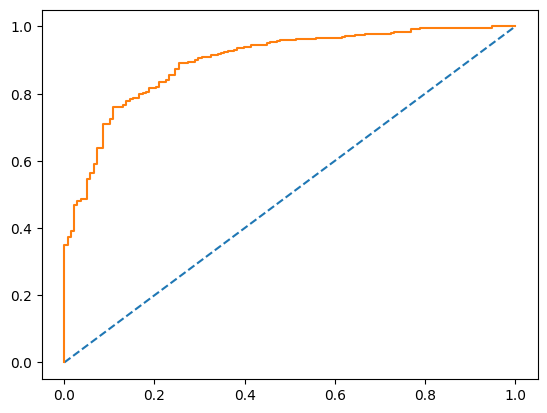

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       138
           1       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [146]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


##### Grid Search Linear Discriminant analysis on scaled data - referenced in business report for q1.6

In [147]:
##
## lets use grid_search to run different models and see which comes at the top
## scaled data is used here


from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## defining the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

## creating the logistic regression model
ldaclf = LinearDiscriminantAnalysis()


## grid_search setup
grid_search = GridSearchCV(ldaclf, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X2_train, y2_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






Best paramters: {'solver': 'svd'}


In [148]:
##
##
## now lets apply linear discriminant analysis on scaled dataframe

ldaclf = LinearDiscriminantAnalysis(solver = 'svd')
model = ldaclf.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)

In [149]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-1.73385609,  1.58962644,  0.52103386,  2.94335483, -3.4972472 ,
        -2.56383116, -1.48167005, -0.03631575]])

0.8378887841658812
AUC: 0.885


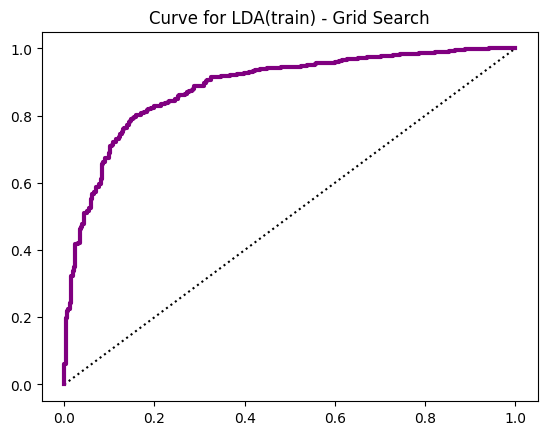

True Negative - 219
False Positive - 103
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       322
         1.0       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [150]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for LDA(train) - Grid Search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8421052631578947
AUC: 0.896


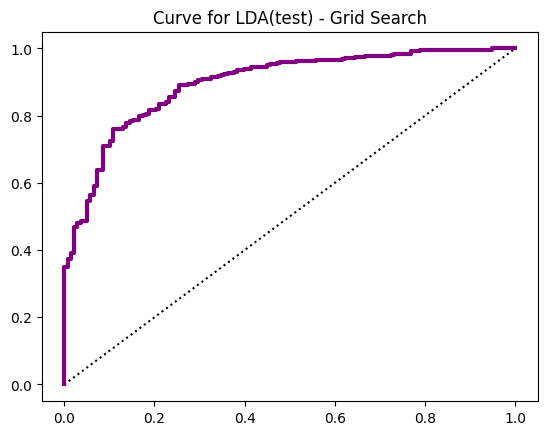

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       138
         1.0       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [151]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for LDA(test) - Grid Search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



##### Grid Searh Gaussian NB on non-scaled data

In [152]:
##
## lets use grid_search to run different models and see which comes at the top
## non-scaled data is used here


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

## creating the GaussianNB model and GridSearchCV object
grid_search_gnb = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param_grid_gnb,
    cv = 5
    )


## fit the grid search model
grid_search_gnb.fit(X1_train, y1_train)

## getting the best parameters and the model
best_params = grid_search_gnb.best_params_
best_model = grid_search_gnb.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






Best paramters: {'var_smoothing': 0.0001}


In [153]:
##
##
## lets run Gaussian Naive Bayes theorem on the non-scaled model

model = GaussianNB(var_smoothing = 0.001)
model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)




0.823751178133836
AUC: 0.882


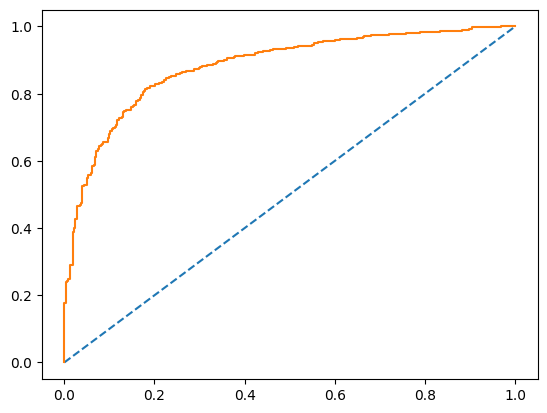

True Negative - 219
False Positive - 103
False Negative - 84
True Positve - 655
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       322
           1       0.86      0.89      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [154]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8442982456140351
AUC: 0.887


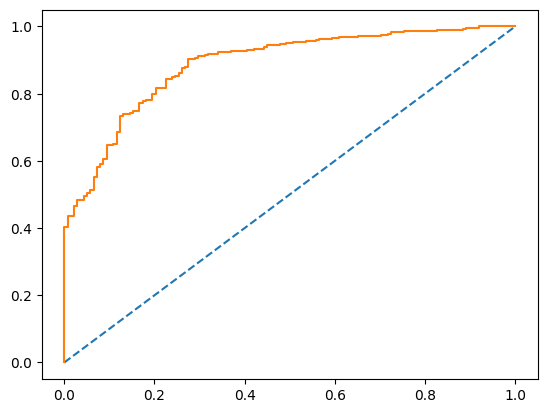

True Negative - 97
False Positive - 41
False Negative - 30
True Positve - 288
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       138
           1       0.88      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [155]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


##### Grid Search Gaussian NB on scaled data - referenced in Business report for q1.6

In [156]:
##
## lets use grid_search to run different models and see which comes at the top
## scaled data is used here


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

## creating the GaussianNB model and GridSearchCV object
grid_search_gnb = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param_grid_gnb,
    cv = 5
    )


## fit the grid search model
grid_search_gnb.fit(X2_train, y2_train)

## getting the best parameters and the model
best_params = grid_search_gnb.best_params_
best_model = grid_search_gnb.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")

Best paramters: {'var_smoothing': 1e-09}


In [157]:
##
##
## lets run Gaussian Naive Bayes theorem on the scaled model

model = GaussianNB(var_smoothing = 1e-09)
model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


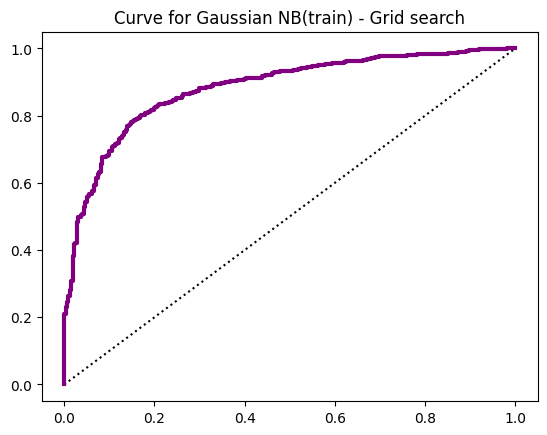

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [158]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for Gaussian NB(train) - Grid search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


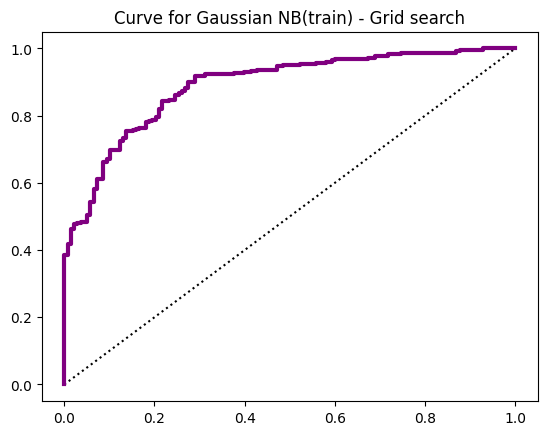

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [159]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for Gaussian NB(train) - Grid search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



##### Grid Search KNN on non-scaled data

In [160]:
##
## KNN using non-scaled data and grid_search cv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## defining the param_grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

## Grid search cv setup
grid_search_knn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid_knn,
    cv = 5
)


## fit the searchcv
grid_search_knn.fit(X1_train, y1_train)

## get the best parameters
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Score: {best_score_knn}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best Score: 0.805868544600939


In [161]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'minkowski'

KNN_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9)

KNN_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = model.predict(X1_train)
y1_test_predict = model.predict(X1_test)

0.6965127238454288
AUC: 0.500


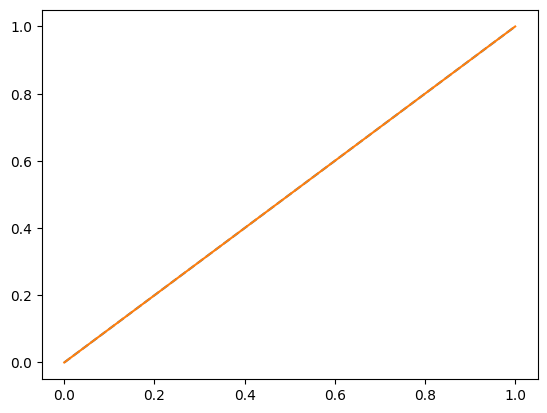

True Negative - 0
False Positive - 322
False Negative - 0
True Positve - 739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.70      1.00      0.82       739

    accuracy                           0.70      1061
   macro avg       0.35      0.50      0.41      1061
weighted avg       0.49      0.70      0.57      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
##
##
## lets see the scores for the train dataframe

print(model.score(X1_train, y1_train))


## predict probabilities
prob = model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.6973684210526315
AUC: 0.500


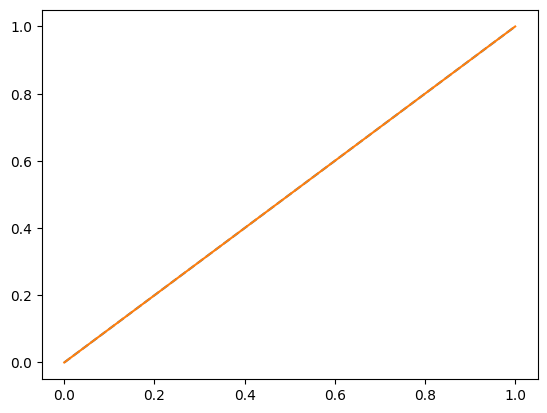

True Negative - 0
False Positive - 138
False Negative - 0
True Positve - 318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.35      0.50      0.41       456
weighted avg       0.49      0.70      0.57       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
##
##
## lets see the scores for the test dataframe

print(model.score(X1_test, y1_test))


## predict probabilities
prob = model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))


##### Grid Search KNN on scaled data - referenced in Busines report for q1.6

In [164]:
##
## KNN using scaled data and grid_search cv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## defining the param_grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

## Grid search cv setup
grid_search_knn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid_knn,
    cv = 5
)


## fit the searchcv
grid_search_knn.fit(X2_train, y2_train)

## get the best parameters
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Score: {best_score_knn}")

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9}
Best Score: 0.817131721144477


In [165]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9)

KNN_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = model.predict(X2_train)
y2_test_predict = model.predict(X2_test)




0.824693685202639
AUC: 0.882


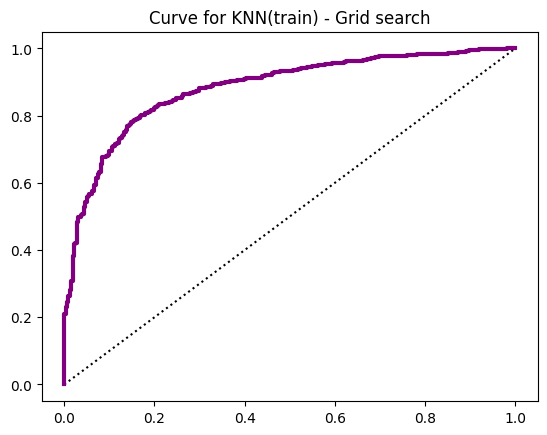

True Negative - 224
False Positive - 98
False Negative - 88
True Positve - 651
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [166]:
##
##
## lets see the scores for the train dataframe

print(model.score(X2_train, y2_train))


## predict probabilities
prob = model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle ='dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for KNN(train) - Grid search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8442982456140351
AUC: 0.889


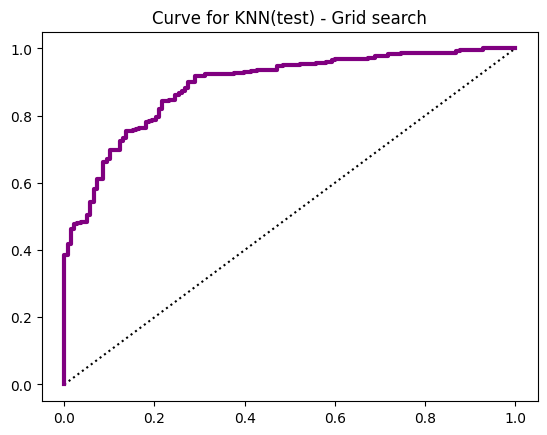

True Negative - 98
False Positive - 40
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       138
         1.0       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



In [167]:
##
##
## lets see the scores for the test dataframe

print(model.score(X2_test, y2_test))


## predict probabilities
prob = model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title('Curve for KNN(test) - Grid search')
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



### squared features and models

Squared features model did not work as expected and they were less effecitve than compared to non-squared. The added variance in this case did not help.

In [168]:
##
## lets use polynomial features to create new features and see how that performs

election3 = pd.DataFrame(election1.drop(['vote'], axis = 1))
election3 = election3 ** 2
election3.columns = [f"{cols}_squared" for cols in election1.drop(['vote'], axis = 1).columns]
election3 = pd.concat([election1, election3], axis = 1)

## let's create the scaled dataset

from sklearn import preprocessing

## setting the model
min_max_scaler = preprocessing.MinMaxScaler()

## transforming the requried data
election3_scaled = min_max_scaler.fit_transform(election3)
election3_scaled = pd.DataFrame(election3_scaled, columns = election3.columns)


In [169]:
##
##

election3_scaled.describe().T


## after scaling we can see that the data is much more consistent and this would enable a better model
## best referenc is the mean of age is very close to the other features


count      mean       std  min       25%  \
vote                             1517.0  0.696770  0.459805  0.0  0.000000   
age                              1517.0  0.438279  0.227561  0.0  0.246377   
economic.cond.national           1517.0  0.561305  0.220448  0.0  0.500000   
economic.cond.household          1517.0  0.534443  0.232767  0.0  0.500000   
Blair                            1517.0  0.583883  0.293693  0.0  0.250000   
Hague                            1517.0  0.437376  0.308120  0.0  0.250000   
Europe                           1517.0  0.574028  0.329904  0.0  0.300000   
political.knowledge              1517.0  0.513514  0.361472  0.0  0.000000   
gender                           1517.0  0.467370  0.499099  0.0  0.000000   
age_squared                      1517.0  0.323609  0.217490  0.0  0.136876   
economic.cond.national_squared   1517.0  0.429521  0.234547  0.0  0.333333   
economic.cond.household_squared  1517.0  0.404664  0.243044  0.0  0.333333   
Blair_squared                    1517.0  0.479373  0.299162  0.0  0.125000   
Hague_squared                    1517.0  0.336574  0.295615  0.0  0.125000   
Europe_squared                   1517.0  0.460899  0.366195  0.0  0.125000   
political.knowledge_squared      1517.0  0.394272  0.331836  0.0  0.000000   
gender_squared                   1517.0  0.467370  0.499099  0.0  0.000000   

                                      50%       75%  max  
vote                             1.000000  1.000000  1.0  
age                              0.420290  0.623188  1.0  
economic.cond.national           0.500000  0.750000  1.0  
economic.cond.household          0.500000  0.750000  1.0  
Blair                            0.750000  0.750000  1.0  
Hague                            0.250000  0.750000  1.0  
Europe                           0.500000  0.900000  1.0  
political.knowledge              0.666667  0.666667  1.0  
gender                           0.000000  1.000000  1.0  
age_squared                      0.276601  0.484702  1.0  
economic.cond.national_squared   0.333333  0.625000  1.0  
economic.cond.household_squared  0.333333  0.625000  1.0  
Blair_squared                    0.625000  0.625000  1.0  
Hague_squared                    0.125000  0.625000  1.0  
Europe_squared                   0.291667  0.825000  1.0  
political.knowledge_squared      0.444444  0.444444  1.0  
gender_squared                   0.000000  1.000000  1.0

In [170]:
##
## now lets split the data in 70:30 ration, with random state as 42
## this is for the non-scaled data

from sklearn import model_selection

X3 = election3.drop(['vote'], axis = 1)
y3 = election3['vote'].copy()

X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, test_size = 0.30, random_state = 42, stratify = y3)



In [171]:
##
## The reason for stratification is because we do not have a equal or similar distribution of the target variable categories

print(y3_train.value_counts())
print(y3_test.value_counts())


1    739
0    322
Name: vote, dtype: int64
1    318
0    138
Name: vote, dtype: int64


In [172]:
##
## now lets split the data in 70:30 ration, with random state as 42
## this is for the scaled data

from sklearn import model_selection

X4 = election3_scaled.drop(['vote'], axis = 1)
y4 = election3_scaled['vote'].copy()

X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4, y4, test_size = 0.30, random_state = 42, stratify = y4)



In [173]:
##
## The reason for stratification is because we do not have a equal or similar distribution of the target variable categories

print(y4_train.value_counts())
print(y4_test.value_counts())


1.0    739
0.0    322
Name: vote, dtype: int64
1.0    318
0.0    138
Name: vote, dtype: int64


In [174]:
##
## lets use grid_search to run different models and see which comes at the top
## none-scaled data is used here


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid = {
    'penalty': ['l2', None],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100000],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001]
}

## creating the logistic regression model
logreg = LogisticRegression()

## grid_search setup
grid_search = GridSearchCV(logreg, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X3_train, y3_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")



## this code runs for a few minutes (4 to 5 mins..) and we get the below LineSearchWarning *_*
## this means that with the given parameters the models are not able to get the best model and *_*
## we get what is the probabble best

## hence it is better to just leave non-scaled dataframe and just focus on the scaled versions


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

Best paramters: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}


In [175]:
##
## lets use grid_search to run different models and see which comes at the top
## none-scaled data is used here


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid = {
    'penalty': ['l2', None],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [10000],
    'tol': [0.0001, 0.00001, 0.000001]
}

## creating the logistic regression model
logreg = LogisticRegression()

## grid_search setup
grid_search = GridSearchCV(logreg, param_grid, cv = 5)

## fit the grid search model
grid_search.fit(X4_train, y4_train)

## getting the best parameters and the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")


Best paramters: {'max_iter': 10000, 'penalty': None, 'solver': 'newton-cg', 'tol': 0.0001}


In [176]:
##
##
## now lets apply logistic regression analysis on scaled dataframe

model = LogisticRegression(max_iter = 10000, penalty = 'l2', solver = 'newton-cg', tol = 0.0001)
model.fit(X4_train, y4_train)


## predictions
y4_train_predict = model.predict(X4_train)
y4_test_predict = model.predict(X4_test)

In [177]:
##
## model feature importances
## in the order given below
## age	economic.cond.national	economic.cond.household	Blair	Hague	Europe	political.knowledge	gender

model.coef_



array([[-6.22016255e-01,  5.12037618e-01,  3.76201377e-01,
         4.50267553e-01, -1.56016424e+00, -1.75872198e+00,
        -1.36422814e+00, -1.34533484e-03, -7.18701032e-01,
         1.02393885e+00,  4.27244964e-02,  1.93232292e+00,
        -1.40791044e+00, -3.76576304e-01,  3.80534511e-01,
        -1.34533484e-03]])

0.8341187558906692
AUC: 0.888


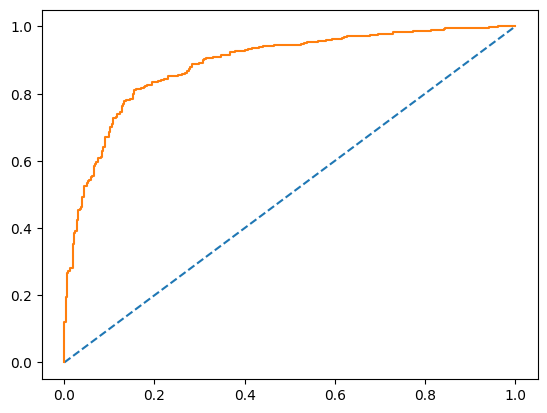

True Negative - 210
False Positive - 112
False Negative - 64
True Positve - 675
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.70       322
         1.0       0.86      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [178]:
##
##
## lets see the scores for the train dataframe

print(model.score(X4_train, y4_train))


## predict probabilities
prob = model.predict_proba(X4_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y4_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_train, y4_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_train, y4_train_predict))



0.8377192982456141
AUC: 0.897


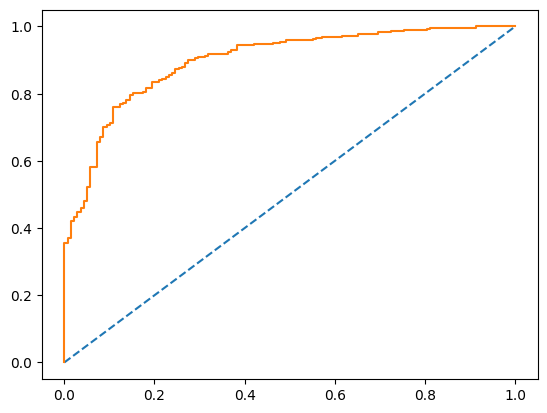

True Negative - 90
False Positive - 48
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

         0.0       0.78      0.65      0.71       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [179]:
##
##
## lets see the scores for the test dataframe

print(model.score(X4_test, y4_test))


## predict probabilities
prob = model.predict_proba(X4_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y4_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_test, y4_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_test, y4_test_predict))



Param Grid and Grid search for Naive bayes

In [180]:
##
## lets use grid_search to run different models and see which comes at the top
## non-scaled data is used here


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

## creating the GaussianNB model and GridSearchCV object
grid_search_gnb = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param_grid_gnb,
    cv = 5
    )


## fit the grid search model
grid_search_gnb.fit(X3_train, y3_train)

## getting the best parameters and the model
best_params = grid_search_gnb.best_params_
best_model = grid_search_gnb.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")






Best paramters: {'var_smoothing': 1e-09}


In [181]:
##
##
## lets run Gaussian Naive Bayes theorem on the non-scaled model

model = GaussianNB(var_smoothing = 1e-07)
model.fit(X3_train, y3_train)


## predictions
y3_train_predict = model.predict(X3_train)
y3_test_predict = model.predict(X3_test)




0.822808671065033
AUC: 0.884


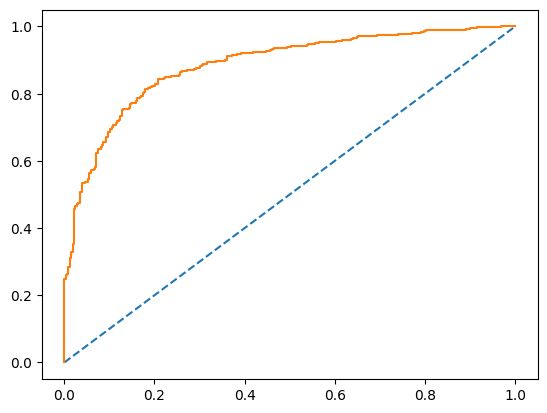

True Negative - 243
False Positive - 79
False Negative - 109
True Positve - 630
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       322
           1       0.89      0.85      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.83      0.82      0.82      1061



In [182]:
##
##
## lets see the scores for the train dataframe

print(model.score(X3_train, y3_train))


## predict probabilities
prob = model.predict_proba(X3_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y3_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y3_train, y3_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y3_train, y3_train_predict))



0.8289473684210527
AUC: 0.889


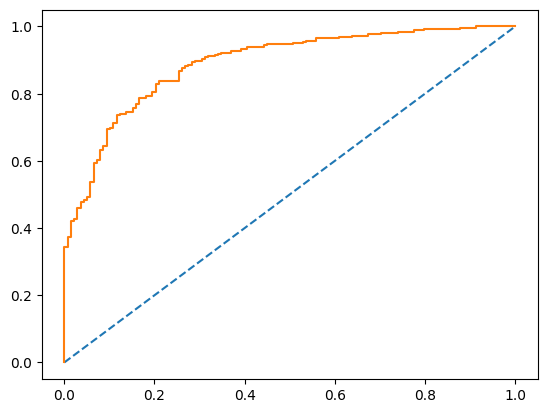

True Negative - 102
False Positive - 36
False Negative - 42
True Positve - 276
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       138
           1       0.88      0.87      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [183]:
##
##
## lets see the scores for the test dataframe

print(model.score(X3_test, y3_test))


## predict probabilities
prob = model.predict_proba(X3_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y3_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y3_test, y3_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y3_test, y3_test_predict))


In [184]:
##
## lets use grid_search to run different models and see which comes at the top
## scaled data is used here


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


## defining the parameter grid
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

## creating the GaussianNB model and GridSearchCV object
grid_search_gnb = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param_grid_gnb,
    cv = 5
    )


## fit the grid search model
grid_search_gnb.fit(X4_train, y4_train)

## getting the best parameters and the model
best_params = grid_search_gnb.best_params_
best_model = grid_search_gnb.best_estimator_


## best parameters
print(f"Best paramters: {best_params}")

Best paramters: {'var_smoothing': 1e-09}


In [185]:
##
##
## lets run Gaussian Naive Bayes theorem on the scaled model

model = GaussianNB(var_smoothing = 1e-09)
model.fit(X4_train, y4_train)


## predictions
y4_train_predict = model.predict(X4_train)
y4_test_predict = model.predict(X4_test)




0.820923656927427
AUC: 0.884


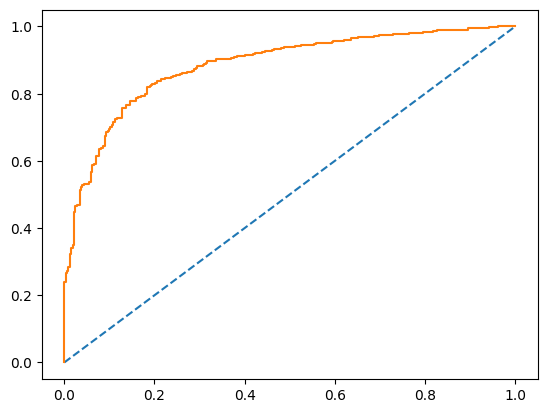

True Negative - 242
False Positive - 80
False Negative - 110
True Positve - 629
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       322
         1.0       0.89      0.85      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.80      0.79      1061
weighted avg       0.83      0.82      0.82      1061



In [186]:
##
##
## lets see the scores for the train dataframe

print(model.score(X4_train, y4_train))


## predict probabilities
prob = model.predict_proba(X4_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y4_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_train, y4_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_train, y4_train_predict))



0.8333333333333334
AUC: 0.891


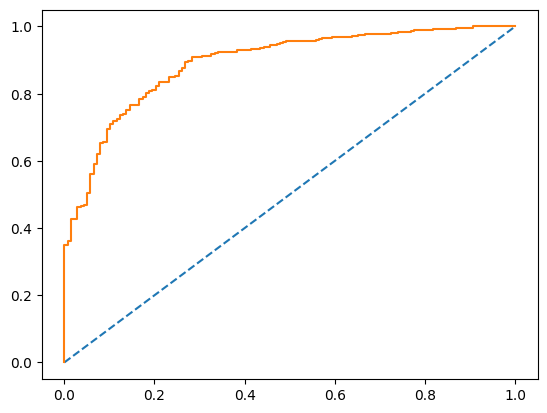

True Negative - 102
False Positive - 36
False Negative - 40
True Positve - 278
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       138
         1.0       0.89      0.87      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.83      0.83       456



In [187]:
##
##
## lets see the scores for the test dataframe

print(model.score(X4_test, y4_test))


## predict probabilities
prob = model.predict_proba(X4_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y4_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_test, y4_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_test, y4_test_predict))



K-Nearest-Neighbors model

In [188]:
##
## KNN using scaled data and grid_search cv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## defining the param_grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

## Grid search cv setup
grid_search_knn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid_knn,
    cv = 5
)


## fit the searchcv
grid_search_knn.fit(X3_train, y3_train)

## get the best parameters
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Score: {best_score_knn}")


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best Score: 0.7408450704225352


In [189]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'minkowski'

KNN_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5)

KNN_model.fit(X3_train, y3_train)


## predictions
y3_train_predict = model.predict(X3_train)
y3_test_predict = model.predict(X3_test)

0.30348727615457116
AUC: 0.500


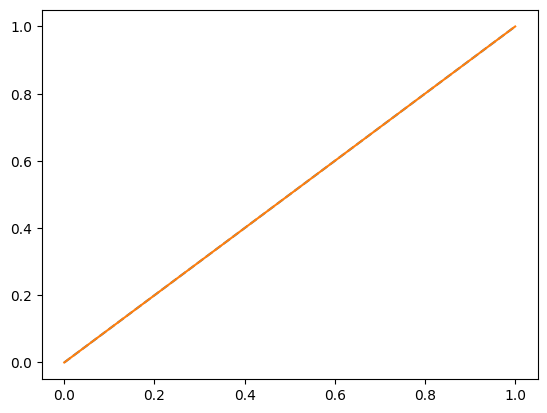

True Negative - 322
False Positive - 0
False Negative - 739
True Positve - 0
              precision    recall  f1-score   support

           0       0.30      1.00      0.47       322
           1       0.00      0.00      0.00       739

    accuracy                           0.30      1061
   macro avg       0.15      0.50      0.23      1061
weighted avg       0.09      0.30      0.14      1061



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
##
##
## lets see the scores for the train dataframe

print(model.score(X3_train, y3_train))


## predict probabilities
prob = model.predict_proba(X3_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y3_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y3_train, y3_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y3_train, y3_train_predict))



0.3026315789473684
AUC: 0.500


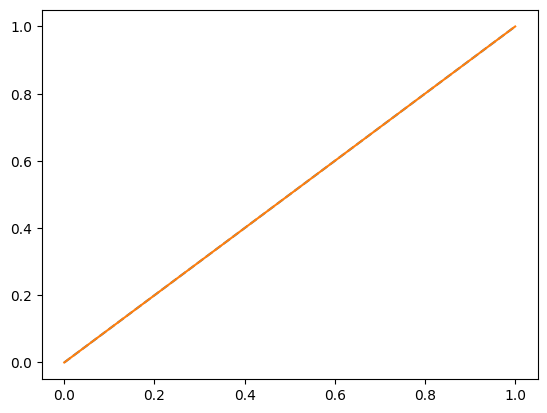

True Negative - 138
False Positive - 0
False Negative - 318
True Positve - 0
              precision    recall  f1-score   support

           0       0.30      1.00      0.46       138
           1       0.00      0.00      0.00       318

    accuracy                           0.30       456
   macro avg       0.15      0.50      0.23       456
weighted avg       0.09      0.30      0.14       456



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
##
##
## lets see the scores for the test dataframe

print(model.score(X3_test, y3_test))


## predict probabilities
prob = model.predict_proba(X3_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y3_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y3_test, y3_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y3_test, y3_test_predict))


In [192]:
##
## KNN using scaled data and grid_search cv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## defining the param_grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

## Grid search cv setup
grid_search_knn = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid_knn,
    cv = 5
)


## fit the searchcv
grid_search_knn.fit(X4_train, y4_train)

## get the best parameters
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Score: {best_score_knn}")

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9}
Best Score: 0.8152493577819117


In [193]:
##
##
## now lets perform KNN algorithm
## this time n_neighbors = 9 and metric(distance base) is 'euclidean'

KNN_model = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9)

KNN_model.fit(X4_train, y4_train)


## predictions
y4_train_predict = model.predict(X4_train)
y4_test_predict = model.predict(X4_test)




0.820923656927427
AUC: 0.884


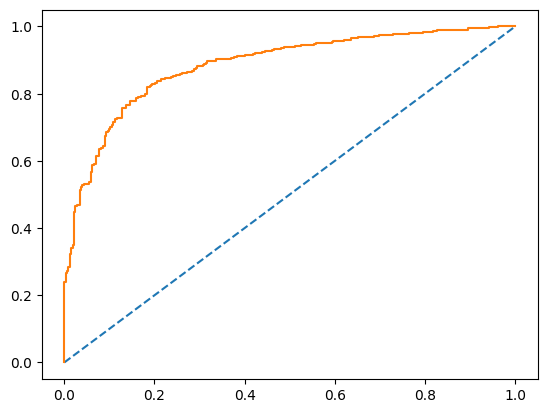

True Negative - 242
False Positive - 80
False Negative - 110
True Positve - 629
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       322
         1.0       0.89      0.85      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.80      0.79      1061
weighted avg       0.83      0.82      0.82      1061



In [194]:
##
##
## lets see the scores for the train dataframe

print(model.score(X4_train, y4_train))


## predict probabilities
prob = model.predict_proba(X4_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y4_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_train, y4_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_train, y4_train_predict))



0.8333333333333334
AUC: 0.891


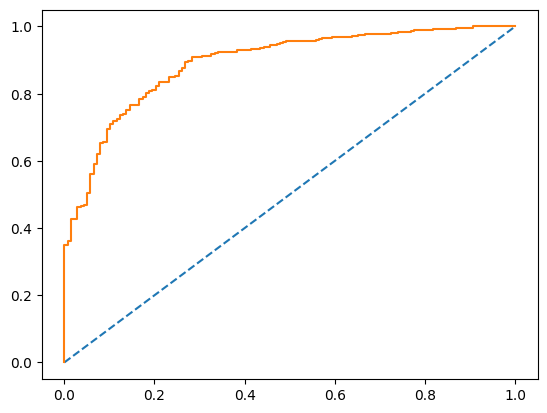

True Negative - 102
False Positive - 36
False Negative - 40
True Positve - 278
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       138
         1.0       0.89      0.87      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.83      0.83       456



In [195]:
##
##
## lets see the scores for the test dataframe

print(model.score(X4_test, y4_test))


## predict probabilities
prob = model.predict_proba(X4_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y4_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y4_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y4_test, y4_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y4_test, y4_test_predict))



###Bagging

#### Bagging classifier with base estimtor as none on the non-scaled model

In [196]:
##
## lets attempt bagging without any determined base estimator *_*
## if the base estimator is "None", then it would use decision trees
## this will be for the non-scaled data

from sklearn.ensemble import BaggingClassifier

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = None,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = bagging_model.predict(X1_train)
y1_test_predict = bagging_model.predict(X1_test)

0.9877474081055608
AUC: 1.000


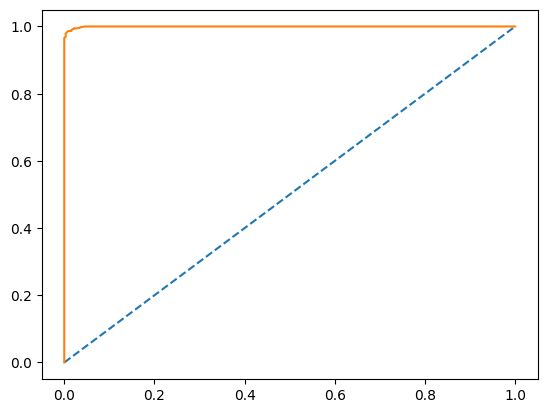

True Negative - 313
False Positive - 9
False Negative - 4
True Positve - 735
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       322
           1       0.99      0.99      0.99       739

    accuracy                           0.99      1061
   macro avg       0.99      0.98      0.99      1061
weighted avg       0.99      0.99      0.99      1061



In [197]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X1_train, y1_train))


## predict probabilities
prob = bagging_model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8289473684210527
AUC: 0.877


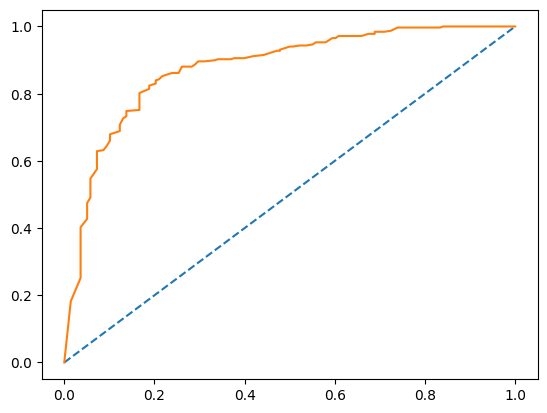

True Negative - 91
False Positive - 47
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.83       456



In [198]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X1_test, y1_test))


## predict probabilities
prob = bagging_model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Bagging classifier with base estimtor as none on the scaled model

In [199]:
##
## lets attempt bagging using the base-estimator as none
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = None,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

0.9877474081055608
AUC: 1.000


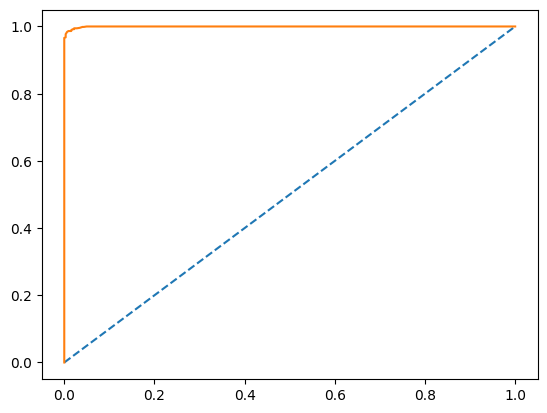

True Negative - 313
False Positive - 9
False Negative - 4
True Positve - 735
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       322
         1.0       0.99      0.99      0.99       739

    accuracy                           0.99      1061
   macro avg       0.99      0.98      0.99      1061
weighted avg       0.99      0.99      0.99      1061



In [200]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8289473684210527
AUC: 0.877


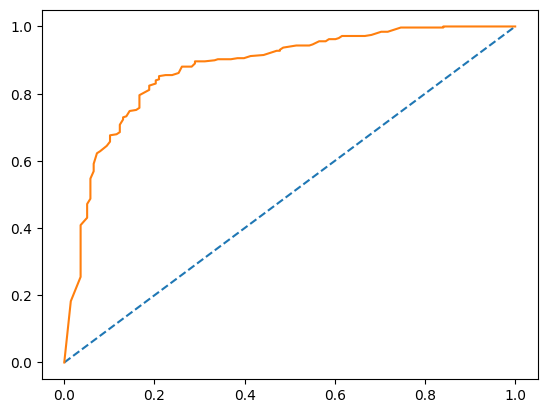

True Negative - 91
False Positive - 47
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       138
         1.0       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.83       456



In [201]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Bagging classifier with base estimtor as logistic regression on the non-sclaed model

In [202]:
##
## lets attempt bagging for the Logistic regression
## this will be for the non-scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

## initializing the base estimator
logmodel = LogisticRegression(max_iter = 10000, penalty = 'l2', solver = 'newton-cg', tol = 0.001)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = logmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = bagging_model.predict(X1_train)
y1_test_predict = bagging_model.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8388312912346843
AUC: 0.885


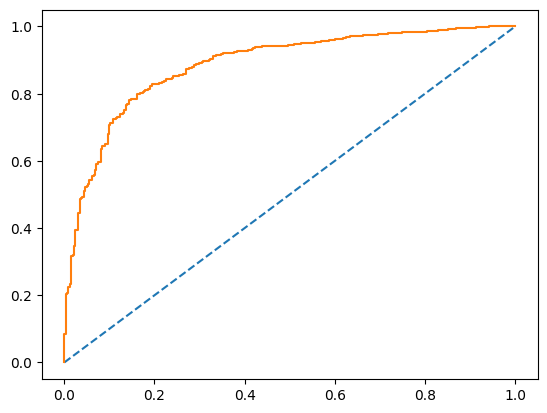

True Negative - 215
False Positive - 107
False Negative - 64
True Positve - 675
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [203]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X1_train, y1_train))


## predict probabilities
prob = bagging_model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8399122807017544
AUC: 0.897


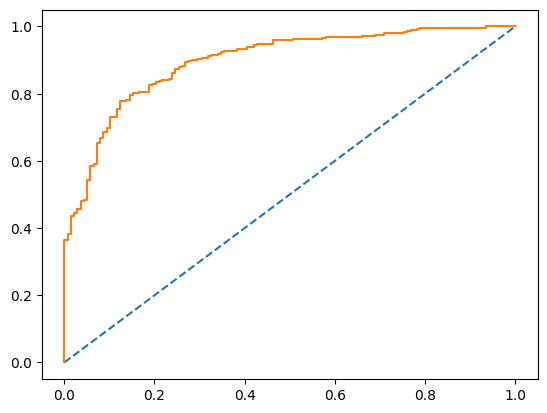

True Negative - 91
False Positive - 47
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [204]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X1_test, y1_test))


## predict probabilities
prob = bagging_model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Bagging classifier with base estimtor as logistic regression on the scaled model

In [205]:
##
## lets attempt bagging for the Logistic regression
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

## initializing the base estimator
logmodel = LogisticRegression(max_iter = 10000, penalty = None, solver = 'newton-cg', tol = 0.001)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = logmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8388312912346843
AUC: 0.885


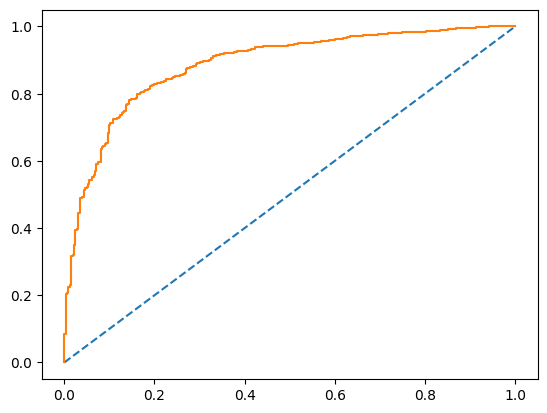

True Negative - 216
False Positive - 106
False Negative - 65
True Positve - 674
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       322
         1.0       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [206]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8377192982456141
AUC: 0.897


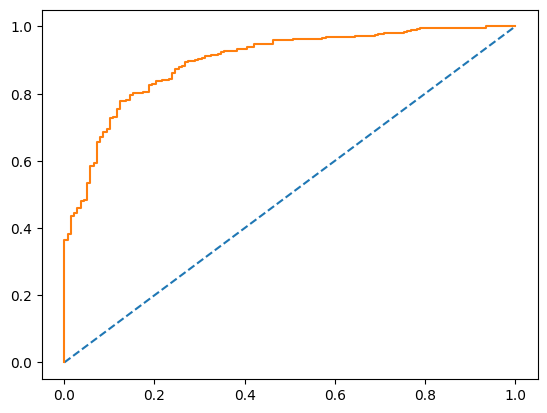

True Negative - 91
False Positive - 47
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [207]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Bagging classifier with base estimtor as LDA on the non-scaled model

In [208]:
##
## lets attempt bagging for the LDA
## this will be for the non-scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## initializing the base estimator
ldamodel = LinearDiscriminantAnalysis()

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = ldamodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = bagging_model.predict(X1_train)
y1_test_predict = bagging_model.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8388312912346843
AUC: 0.885


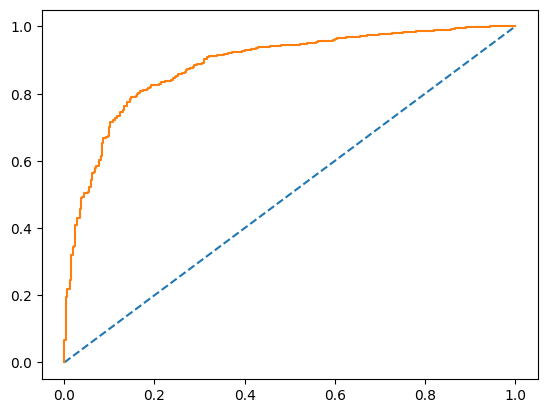

True Negative - 220
False Positive - 102
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [209]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X1_train, y1_train))


## predict probabilities
prob = bagging_model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8421052631578947
AUC: 0.897


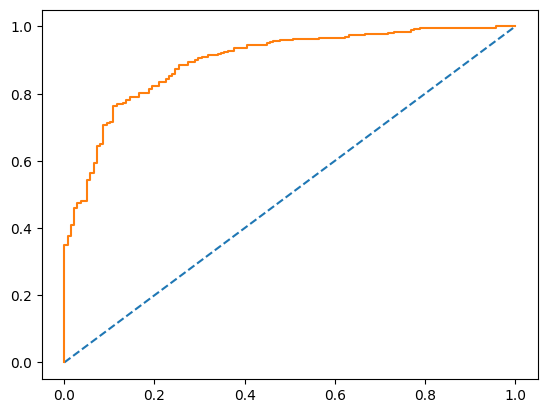

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       138
           1       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [210]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X1_test, y1_test))


## predict probabilities
prob = bagging_model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Bagging classifier with base estimtor as LDA on the scaled model

In [211]:
##
## lets attempt bagging for the LDA
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## initializing the base estimator
ldamodel = LinearDiscriminantAnalysis()

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = ldamodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8388312912346843
AUC: 0.885


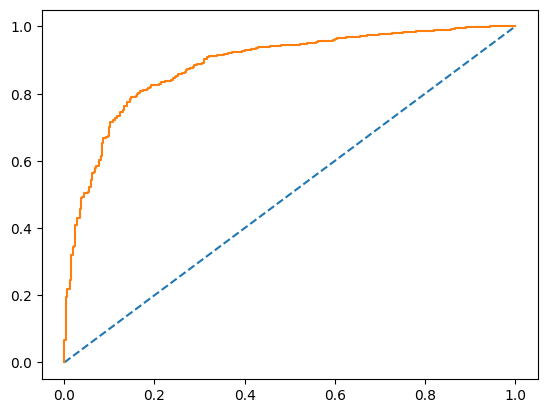

True Negative - 220
False Positive - 102
False Negative - 69
True Positve - 670
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       322
         1.0       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [212]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8421052631578947
AUC: 0.897


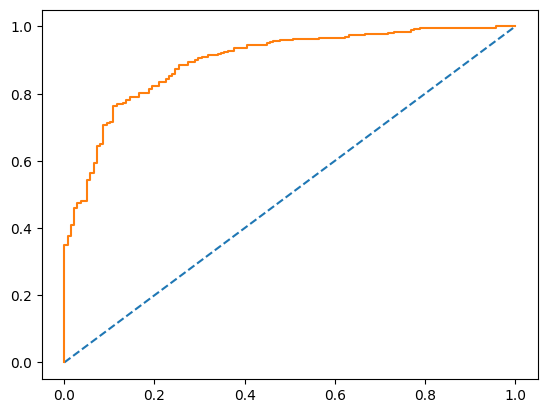

True Negative - 93
False Positive - 45
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       138
         1.0       0.87      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



In [213]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Bagging classifier with base estimtor as GNB on the non-scaled model

In [214]:
##
## lets attempt bagging for the Gaussin Naive Bayes
## this will be for the non-scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

## initializing the base estimator
GNBmodel = GaussianNB(var_smoothing = 0.001)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = GNBmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = bagging_model.predict(X1_train)
y1_test_predict = bagging_model.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.825636192271442
AUC: 0.882


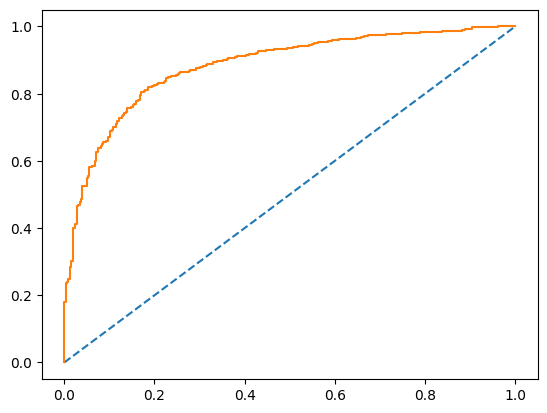

True Negative - 220
False Positive - 102
False Negative - 83
True Positve - 656
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [215]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X1_train, y1_train))


## predict probabilities
prob = bagging_model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8464912280701754
AUC: 0.888


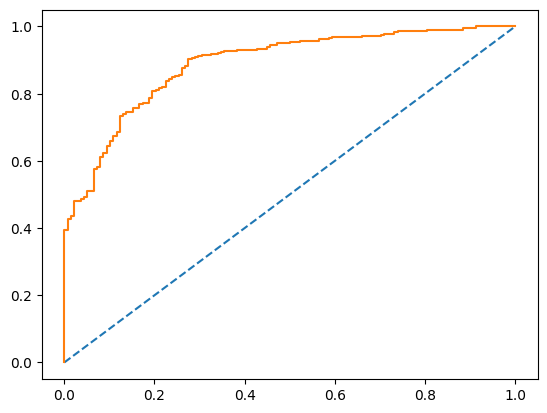

True Negative - 97
False Positive - 41
False Negative - 29
True Positve - 289
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.85      0.84       456



In [216]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X1_test, y1_test))


## predict probabilities
prob = bagging_model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Bagging classifier with base estimtor as GNB on the scaled model

In [217]:
##
## lets attempt bagging for the GaussianNB
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

## initializing the base estimator
GNBmodel = GaussianNB(var_smoothing = 1e-09)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = GNBmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.825636192271442
AUC: 0.882


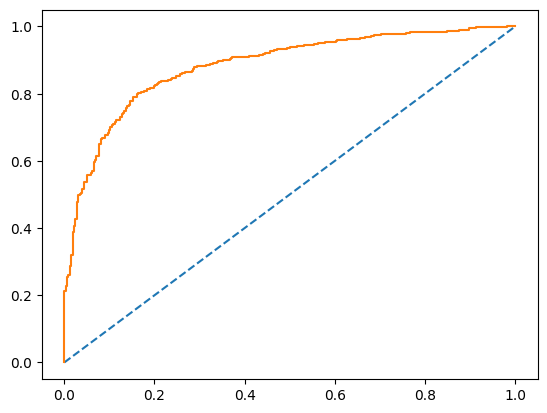

True Negative - 223
False Positive - 99
False Negative - 86
True Positve - 653
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71       322
         1.0       0.87      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [218]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8464912280701754
AUC: 0.890


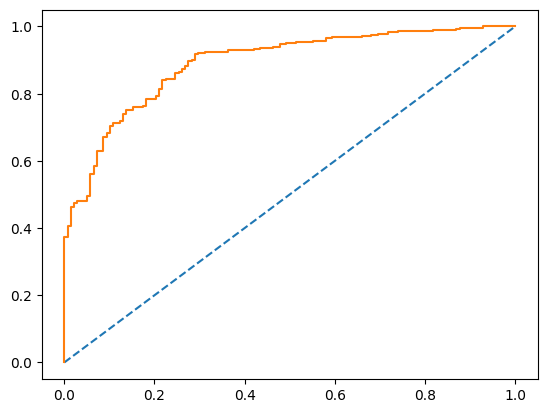

True Negative - 98
False Positive - 40
False Negative - 30
True Positve - 288
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       138
         1.0       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.85      0.84       456



In [219]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Bagging classifier with base estimtor as KNN on the non-scaled model

In [220]:
##
## lets attempt bagging for the KNN
## this will be for the non-scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## initializing the base estimator
KNNmodel = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = KNNmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X1_train, y1_train)


## predictions
y1_train_predict = bagging_model.predict(X1_train)
y1_test_predict = bagging_model.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8312912346842601
AUC: 0.911


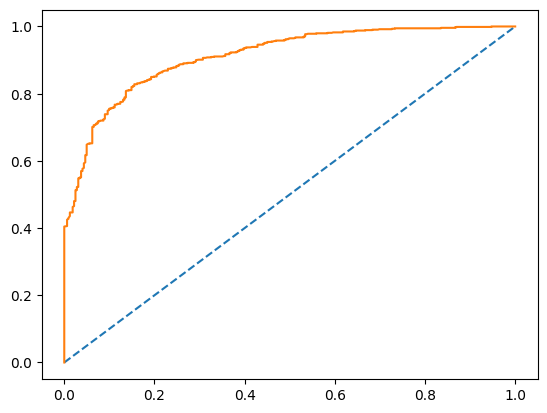

True Negative - 207
False Positive - 115
False Negative - 64
True Positve - 675
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [221]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X1_train, y1_train))


## predict probabilities
prob = bagging_model.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8092105263157895
AUC: 0.862


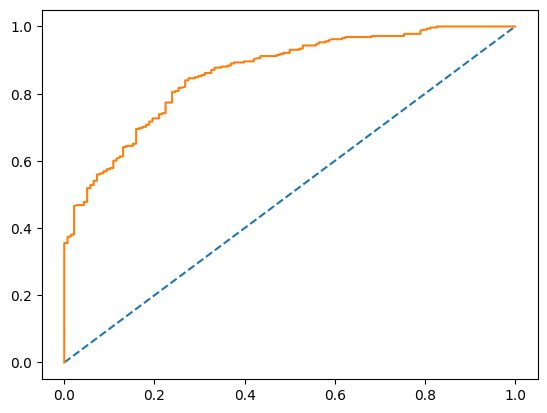

True Negative - 85
False Positive - 53
False Negative - 34
True Positve - 284
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       138
           1       0.84      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.75      0.76       456
weighted avg       0.80      0.81      0.80       456



In [222]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X1_test, y1_test))


## predict probabilities
prob = bagging_model.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Bagging classifier with base estimtor as KNN on the scaled model

In [223]:
##
## lets attempt bagging for the KNN
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## initializing the base estimator
KNNmodel = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 9)

## initializing the bagging classifier
bagging_model = BaggingClassifier(
    base_estimator = KNNmodel,
    n_estimators = 100,
    random_state = 42,
    max_samples = 0.7
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8435438265786993
AUC: 0.913


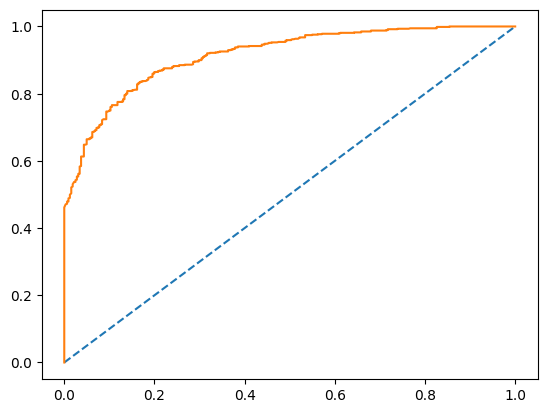

True Negative - 221
False Positive - 101
False Negative - 65
True Positve - 674
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       322
         1.0       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [224]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8333333333333334
AUC: 0.889


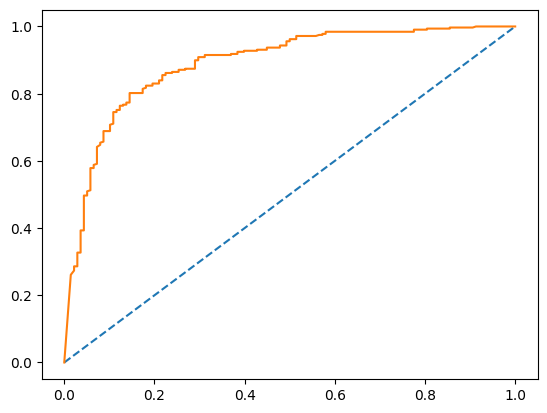

True Negative - 89
False Positive - 49
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       138
         1.0       0.86      0.92      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [225]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Bagging classifier with grid_search on the scaled data - reference in business report for q1.6

In [226]:
##
## bagging classifier grid_search cv


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

## setting up the random forest classifier
rf = RandomForestClassifier()


## random forest enabled bagging classifier
bag = BaggingClassifier(estimator = rf)


## Define parameter grid
param_grid_bagging = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 1.0],
    'bootstrap': [True, False]
}

## Initialize Grid Search
##grid_bagging = GridSearchCV(BaggingClassifier(), param_grid_bagging, cv=5)
grid_bagging = GridSearchCV(bag, param_grid_bagging, cv=5)



## fit the searchcv
grid_bagging.fit(X2_train, y2_train)

## get the best parameters
best_params_bag = grid_bagging.best_params_
best_score_bag = grid_bagging.best_score_

print(f"Best Parameters: {best_params_bag}")
print(f"Best Score: {best_score_bag}")

Best Parameters: {'bootstrap': True, 'max_samples': 0.5, 'n_estimators': 10}
Best Score: 0.8341349986712728


In [227]:
##
## lets attempt bagging classifier
## this will be for the scaled data

from sklearn.ensemble import BaggingClassifier


## initializing the bagging classifier
bagging_model = BaggingClassifier(
    estimator = rf,
    n_estimators = 20,
    random_state = 42,
    max_samples = 0.5,
    bootstrap = False
)

##fit the model
bagging_model.fit(X2_train, y2_train)


## predictions
y2_train_predict = bagging_model.predict(X2_train)
y2_test_predict = bagging_model.predict(X2_test)

0.939679547596607
AUC: 0.989


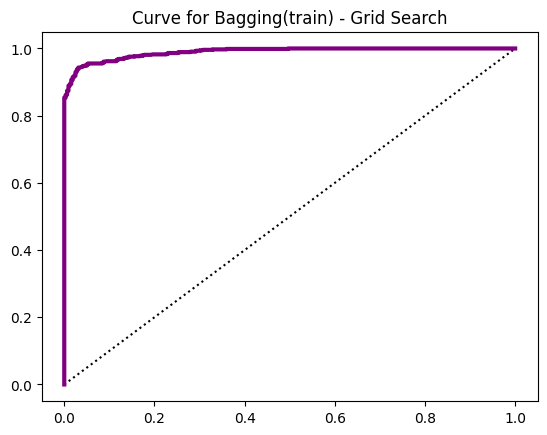

True Negative - 278
False Positive - 44
False Negative - 20
True Positve - 719
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       322
         1.0       0.94      0.97      0.96       739

    accuracy                           0.94      1061
   macro avg       0.94      0.92      0.93      1061
weighted avg       0.94      0.94      0.94      1061



In [228]:
##
##
## lets see the scores for the train dataframe

print(bagging_model.score(X2_train, y2_train))


## predict probabilities
prob = bagging_model.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Bagging(train) - Grid Search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.831140350877193
AUC: 0.887


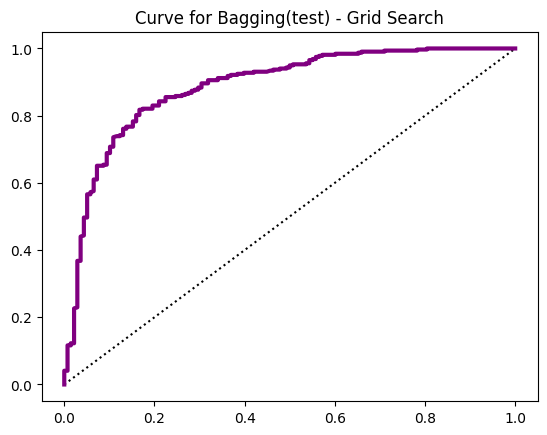

True Negative - 91
False Positive - 47
False Negative - 30
True Positve - 288
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       138
         1.0       0.86      0.91      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



In [229]:
##
##
## lets see the scores for the test dataframe

print(bagging_model.score(X2_test, y2_test))


## predict probabilities
prob = bagging_model.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Bagging(test) - Grid Search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



### Ada Boosting

#### adaboost without any estimator on the non-scaled data

In [230]:
##
## lets attempt ada boosting without any pre-determined estimator *_*
## ada-boosting generally takes a decistion tree of depth 1
## this will be for the non-scaled data

from sklearn.ensemble import AdaBoostClassifier

## initializing the AdaBoosting classifier
adaboost = AdaBoostClassifier(
    n_estimators = 100,
    learning_rate = 1,
    random_state = 42
)

##fit the model
adaboost.fit(X1_train, y1_train)


## predictions
y1_train_predict = adaboost.predict(X1_train)
y1_test_predict = adaboost.predict(X1_test)

0.8360037700282752
AUC: 0.906


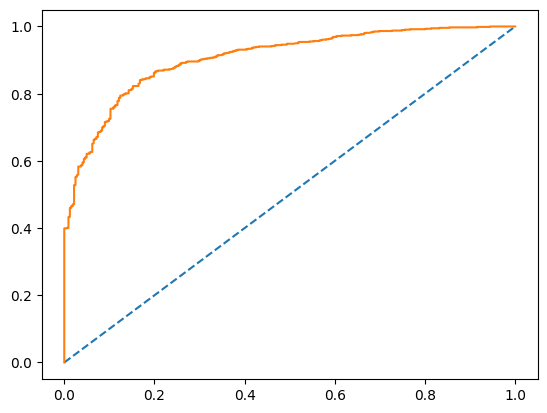

True Negative - 218
False Positive - 104
False Negative - 70
True Positve - 669
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       322
           1       0.87      0.91      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [231]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X1_train, y1_train))


## predict probabilities
prob = adaboost.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8640350877192983
AUC: 0.908


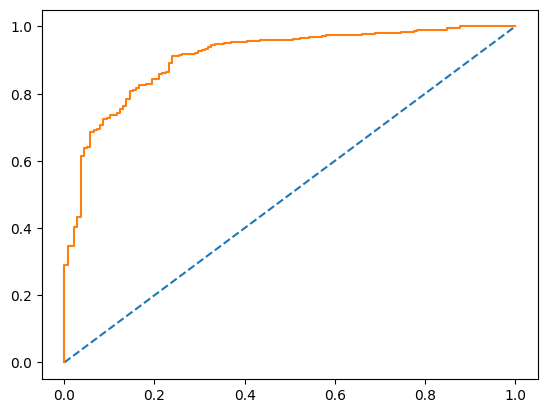

True Negative - 102
False Positive - 36
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       138
           1       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



In [232]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X1_test, y1_test))


## predict probabilities
prob = adaboost.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### adaboost without any estimator on the scaled data

In [233]:
##
## lets attempt adaboosting while defaulting on the base estimator
## this will be for the scaled data

from sklearn.ensemble import AdaBoostClassifier

## initializing the bagging classifier
adaboost = AdaBoostClassifier(
    n_estimators = 100,
    learning_rate = 1,
    random_state = 42
)

##fit the model
adaboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = adaboost.predict(X2_train)
y2_test_predict = adaboost.predict(X2_test)

0.8360037700282752
AUC: 0.906


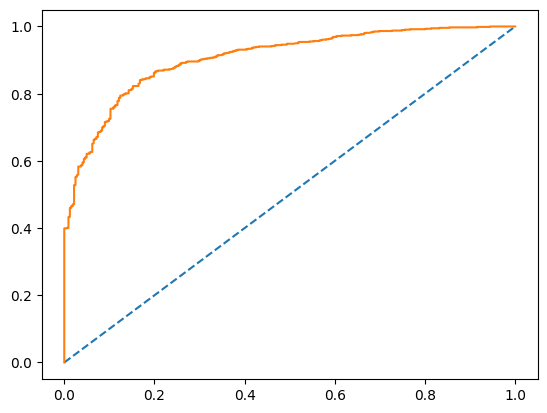

True Negative - 218
False Positive - 104
False Negative - 70
True Positve - 669
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.71       322
         1.0       0.87      0.91      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [234]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X2_train, y2_train))


## predict probabilities
prob = adaboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8640350877192983
AUC: 0.908


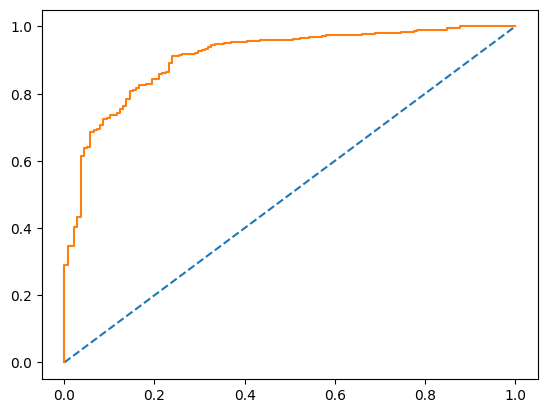

True Negative - 102
False Positive - 36
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       138
         1.0       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



In [235]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X2_test, y2_test))


## predict probabilities
prob = adaboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### adaboost with logreg on the non-scaled data

In [236]:
##
## lets attempt ada boosting for the Logistic regression
## this will be for the non-scaled data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

## initializing the base estimator
logmodel = LogisticRegression(max_iter = 10000, penalty = 'l2', solver = 'newton-cg', tol = 0.001)

## initializing the AdaBoosting classifier
adaboost = AdaBoostClassifier(
    base_estimator = logmodel,
    n_estimators = 100,
    learning_rate = 1,
    random_state = 42
)

##fit the model
adaboost.fit(X1_train, y1_train)


## predictions
y1_train_predict = adaboost.predict(X1_train)
y1_test_predict = adaboost.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8294062205466541
AUC: 0.885


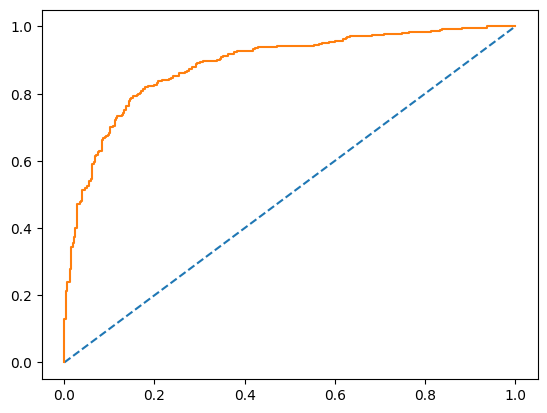

True Negative - 207
False Positive - 115
False Negative - 66
True Positve - 673
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



In [237]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X1_train, y1_train))


## predict probabilities
prob = adaboost.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8399122807017544
AUC: 0.895


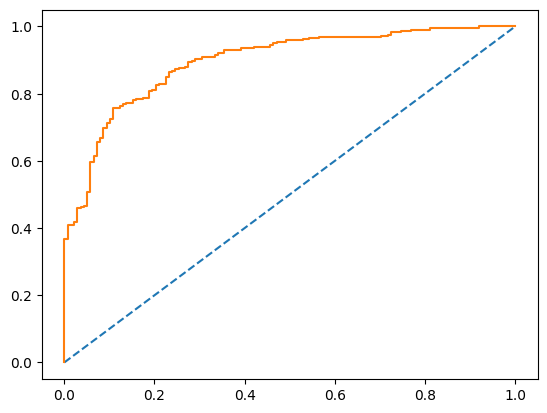

True Negative - 92
False Positive - 46
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [238]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X1_test, y1_test))


## predict probabilities
prob = adaboost.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### adaboost with logreg on the scaled data

In [239]:
##
## lets attempt adaboosting for the Logistic regression
## this will be for the scaled data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

## initializing the base estimator
logmodel = LogisticRegression(max_iter = 10000, penalty = None, solver = 'newton-cg', tol = 0.001)

## initializing the bagging classifier
adaboost = AdaBoostClassifier(
    base_estimator = logmodel,
    n_estimators = 100,
    learning_rate = 1,
    random_state = 42
)

##fit the model
adaboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = adaboost.predict(X2_train)
y2_test_predict = adaboost.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8294062205466541
AUC: 0.885


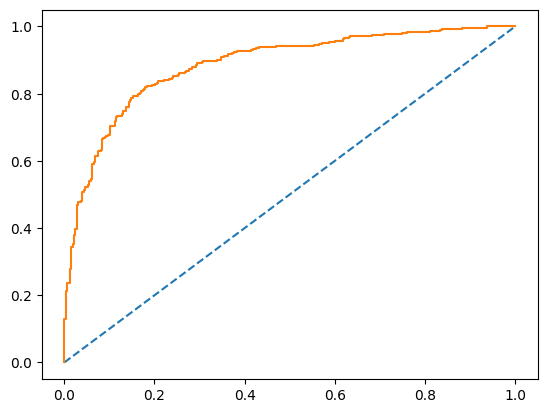

True Negative - 207
False Positive - 115
False Negative - 66
True Positve - 673
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.70       322
         1.0       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



In [240]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X2_train, y2_train))


## predict probabilities
prob = adaboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8399122807017544
AUC: 0.895


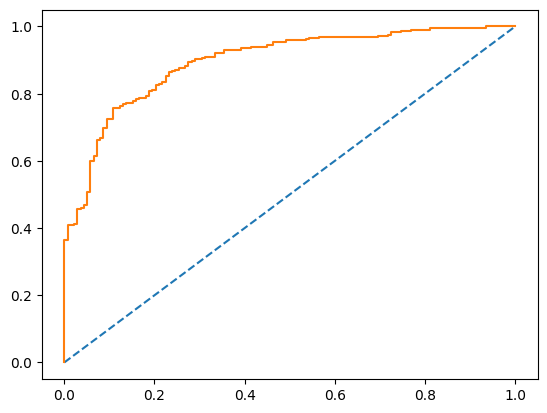

True Negative - 92
False Positive - 46
False Negative - 27
True Positve - 291
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [241]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X2_test, y2_test))


## predict probabilities
prob = adaboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### adaboost with GNB on the non-scaled data

In [242]:
##
## lets attempt adaboosting for the Gaussin Naive Bayes
## this will be for the non-scaled data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

## initializing the base estimator
GNBmodel = GaussianNB(var_smoothing = 0.001)

## initializing the bagging classifier
adaboost = AdaBoostClassifier(
    base_estimator = GNBmodel,
    n_estimators = 100,
    random_state = 42,
    learning_rate = 1
)

##fit the model
adaboost.fit(X1_train, y1_train)


## predictions
y1_train_predict = adaboost.predict(X1_train)
y1_test_predict = adaboost.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.827521206409048
AUC: 0.893


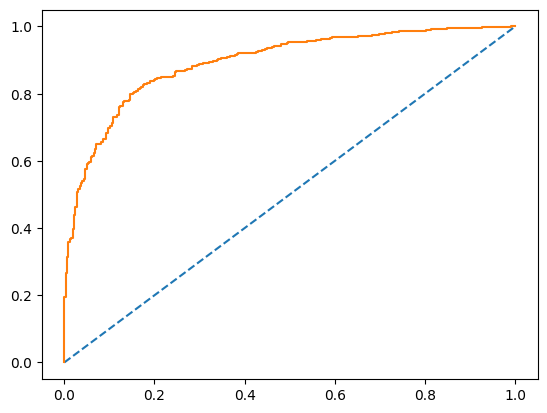

True Negative - 213
False Positive - 109
False Negative - 74
True Positve - 665
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [243]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X1_train, y1_train))


## predict probabilities
prob = adaboost.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8464912280701754
AUC: 0.900


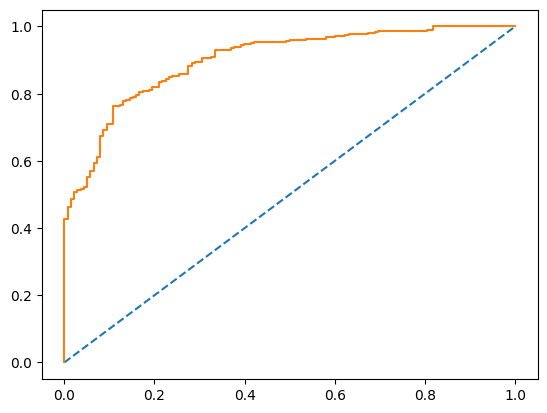

True Negative - 92
False Positive - 46
False Negative - 24
True Positve - 294
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.85      0.84       456



In [244]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X1_test, y1_test))


## predict probabilities
prob = adaboost.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### adaboost with GNB on the scaled data

In [245]:
##
## lets attempt adaboosting for the GaussianNB
## this will be for the scaled data

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

## initializing the base estimator
GNBmodel = GaussianNB(var_smoothing = 1e-09)

## initializing the bagging classifier
adaboost = AdaBoostClassifier(
    base_estimator = GNBmodel,
    n_estimators = 100,
    random_state = 42,
    learning_rate = 1
)

##fit the model
adaboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = adaboost.predict(X2_train)
y2_test_predict = adaboost.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.827521206409048
AUC: 0.893


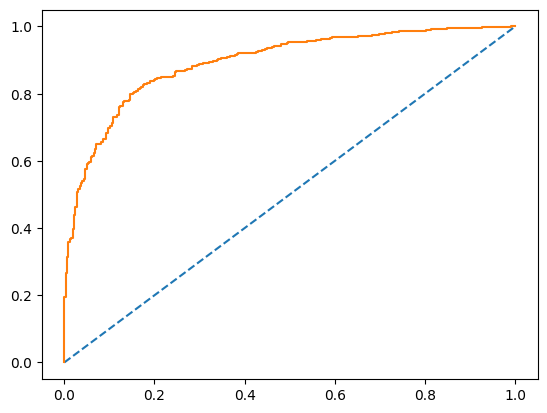

True Negative - 213
False Positive - 109
False Negative - 74
True Positve - 665
              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       322
         1.0       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [246]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X2_train, y2_train))


## predict probabilities
prob = adaboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8464912280701754
AUC: 0.900


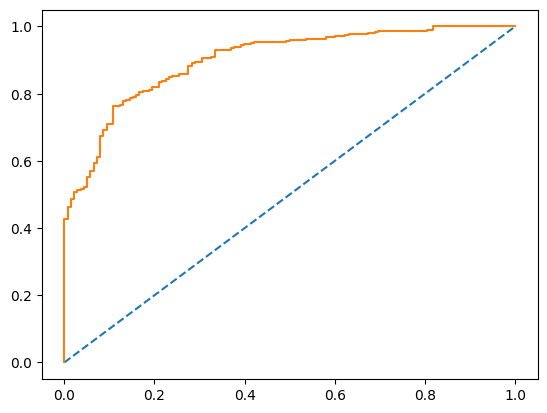

True Negative - 92
False Positive - 46
False Negative - 24
True Positve - 294
              precision    recall  f1-score   support

         0.0       0.79      0.67      0.72       138
         1.0       0.86      0.92      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.85      0.84       456



In [247]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X2_test, y2_test))


## predict probabilities
prob = adaboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### adaboost with grid search on the scaled data

In [248]:
##
##
from sklearn.ensemble import AdaBoostClassifier

## Define parameter grid
param_grid_adaboost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

## Initialize Grid Search
grid_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5)

## Fit the model
grid_adaboost.fit(X2_train, y2_train)

## Get the best parameters
print("Best Parameters for AdaBoost:", grid_adaboost.best_params_)



Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}


In [249]:
##
## lets attempt adaboosting while defaulting on the base estimator
## this will be for the scaled data

from sklearn.ensemble import AdaBoostClassifier

## initializing the bagging classifier
adaboost = AdaBoostClassifier(
    n_estimators = 100,
    learning_rate = 1,
    random_state = 42
)

##fit the model
adaboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = adaboost.predict(X2_train)
y2_test_predict = adaboost.predict(X2_test)

0.8360037700282752
AUC: 0.906


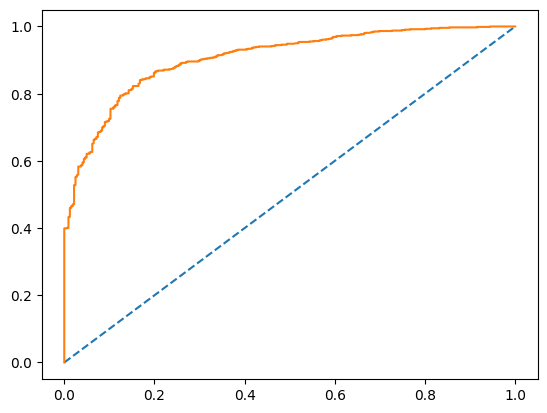

True Negative - 218
False Positive - 104
False Negative - 70
True Positve - 669
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.71       322
         1.0       0.87      0.91      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [250]:
##
##
## lets see the scores for the train dataframe

print(adaboost.score(X2_train, y2_train))


## predict probabilities
prob = adaboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8640350877192983
AUC: 0.908


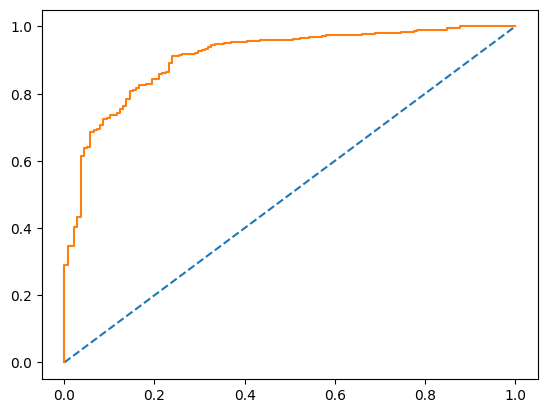

True Negative - 102
False Positive - 36
False Negative - 26
True Positve - 292
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       138
         1.0       0.89      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.83      0.84       456
weighted avg       0.86      0.86      0.86       456



In [251]:
##
##
## lets see the scores for the test dataframe

print(adaboost.score(X2_test, y2_test))


## predict probabilities
prob = adaboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



### Gradient Boosting

#### Gradient boost without any base estimator on the non-scaled data

In [252]:
##
## lets attempt gradient boosting without any determined base estimator *_*
## if the base estimator is "None", then it would use decision trees
## this will be for the non-scaled data

from sklearn.ensemble import GradientBoostingClassifier

## initializing the bagging classifier
gradboost = GradientBoostingClassifier(
    n_estimators = 100,
    random_state = 42
)

##fit the model
gradboost.fit(X1_train, y1_train)


## predictions
y1_train_predict = gradboost.predict(X1_train)
y1_test_predict = gradboost.predict(X1_test)

0.8934967012252591
AUC: 0.950


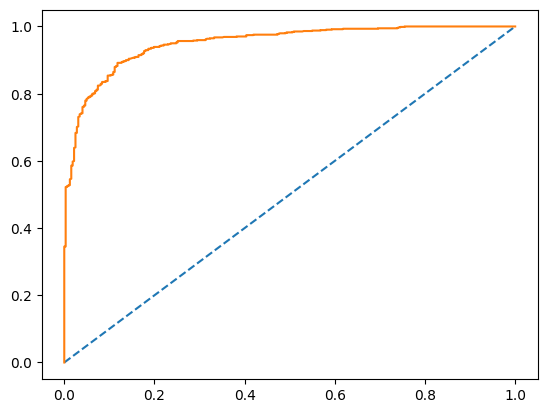

True Negative - 254
False Positive - 68
False Negative - 45
True Positve - 694
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       322
           1       0.91      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [253]:
##
##
## lets see the scores for the train dataframe

print(gradboost.score(X1_train, y1_train))


## predict probabilities
prob = gradboost.predict_proba(X1_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y1_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_train, y1_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_train, y1_train_predict))



0.8421052631578947
AUC: 0.899


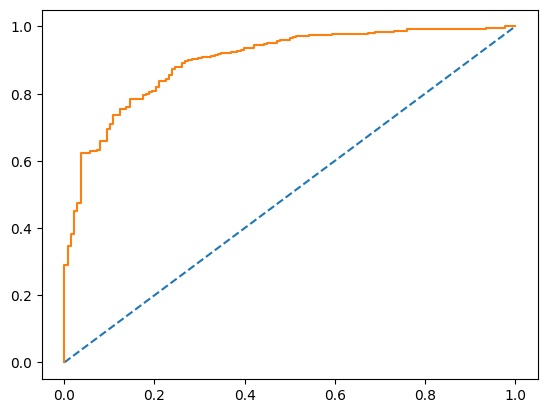

True Negative - 96
False Positive - 42
False Negative - 30
True Positve - 288
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [254]:
##
##
## lets see the scores for the test dataframe

print(gradboost.score(X1_test, y1_test))


## predict probabilities
prob = gradboost.predict_proba(X1_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y1_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y1_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y1_test, y1_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y1_test, y1_test_predict))



#### Gradient boost without any base estimator on the scaled data

In [255]:
##
## lets attempt gradient boosting using the base-estimator as none
## this will be for the scaled data

from sklearn.ensemble import GradientBoostingClassifier

## initializing the bagging classifier
gradboost = GradientBoostingClassifier(
    n_estimators = 100,
    random_state = 42
)

##fit the model
gradboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = gradboost.predict(X2_train)
y2_test_predict = gradboost.predict(X2_test)

0.8934967012252591
AUC: 0.950


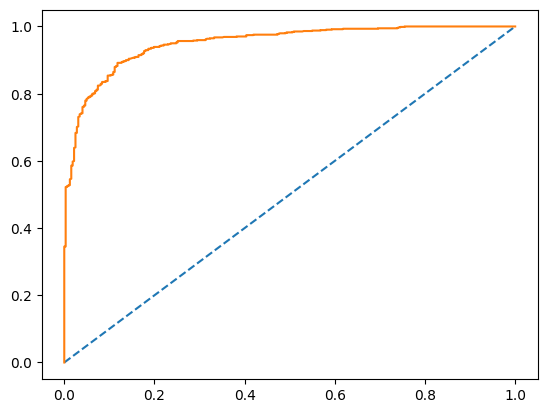

True Negative - 254
False Positive - 68
False Negative - 45
True Positve - 694
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       322
         1.0       0.91      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [256]:
##
##
## lets see the scores for the train dataframe

print(gradboost.score(X2_train, y2_train))


## predict probabilities
prob = gradboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8421052631578947
AUC: 0.899


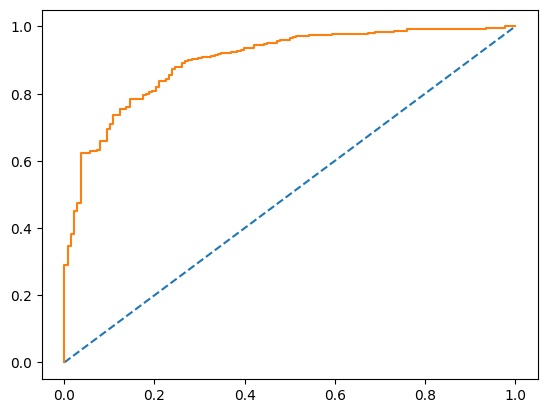

True Negative - 96
False Positive - 42
False Negative - 30
True Positve - 288
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       138
         1.0       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [257]:
##
##
## lets see the scores for the test dataframe

print(gradboost.score(X2_test, y2_test))


## predict probabilities
prob = gradboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = '--')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



#### Gradient boost grid search on the scaled data - referenced in Business report q1.6

In [258]:
##
##

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

## Initialize Grid Search
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)

## Fit the model (Replace X_train and y_train with your actual training data)
grid_gb.fit(X2_train, y2_train)

## Get the best parameters
print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)



Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [259]:
##
## lets attempt gradient boosting using the base-estimator as none
## this will be for the scaled data

from sklearn.ensemble import GradientBoostingClassifier

## initializing the bagging classifier
gradboost = GradientBoostingClassifier(
    n_estimators = 50,
    max_depth = 3,
    learning_rate = 0.1,
    random_state = 42
)

##fit the model
gradboost.fit(X2_train, y2_train)


## predictions
y2_train_predict = gradboost.predict(X2_train)
y2_test_predict = gradboost.predict(X2_test)

0.88124410933082
AUC: 0.937


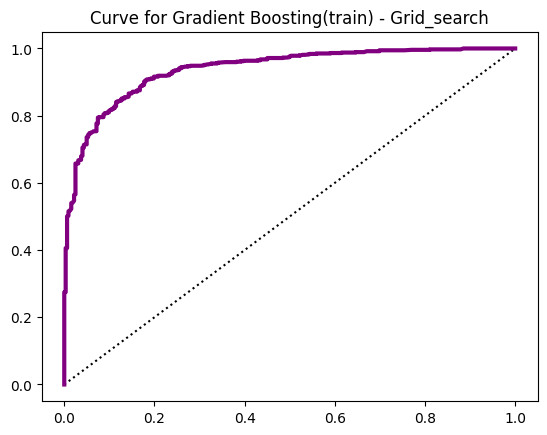

True Negative - 240
False Positive - 82
False Negative - 44
True Positve - 695
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79       322
         1.0       0.89      0.94      0.92       739

    accuracy                           0.88      1061
   macro avg       0.87      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [260]:
##
##
## lets see the scores for the train dataframe

print(gradboost.score(X2_train, y2_train))


## predict probabilities
prob = gradboost.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Gradient Boosting(train) - Grid_search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8377192982456141
AUC: 0.901


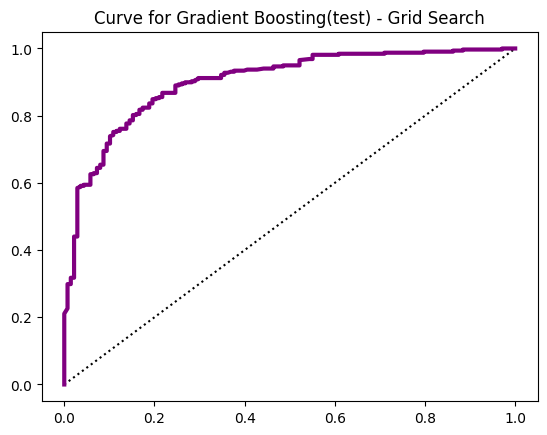

True Negative - 92
False Positive - 46
False Negative - 28
True Positve - 290
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71       138
         1.0       0.86      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



In [261]:
##
##
## lets see the scores for the test dataframe

print(gradboost.score(X2_test, y2_test))


## predict probabilities
prob = gradboost.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Gradient Boosting(test) - Grid Search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))



In [262]:
##
## feature importances

gradboost.feature_importances_

array([0.08370891, 0.04795571, 0.01544431, 0.20954631, 0.31213828,
       0.19669558, 0.13451091, 0.        ])

In [263]:
##
##
X2_train.head()

age  economic.cond.national  economic.cond.household  Blair  Hague  \
940   0.608696                    0.75                     0.50   1.00   0.00   
1496  0.565217                    0.50                     0.25   0.75   0.00   
784   0.739130                    1.00                     0.25   1.00   0.00   
528   0.666667                    0.75                     0.50   0.25   0.75   
996   0.739130                    0.75                     0.50   0.75   0.25   

      Europe  political.knowledge  gender  
940      0.0             0.666667     1.0  
1496     0.2             1.000000     1.0  
784      0.0             0.666667     0.0  
528      0.9             0.666667     0.0  
996      1.0             0.000000     1.0

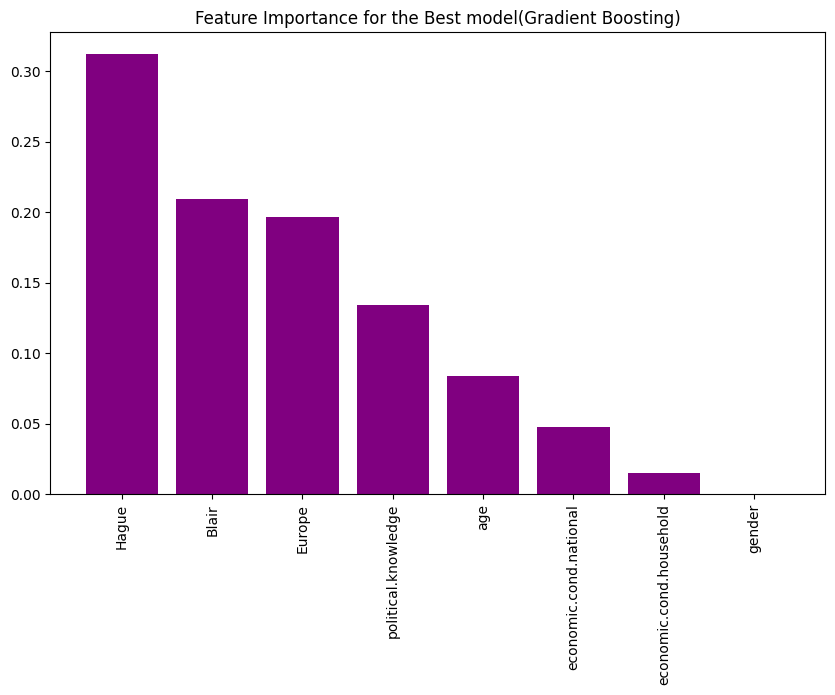

In [264]:
##
##

## Your feature importances and feature names
feature_importances = np.array([0.08370891, 0.04795571, 0.01544431, 0.20954631, 0.31213828, 0.19669558, 0.13451091, 0.0])
feature_names = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

## Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

## Create the plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importance for the Best model(Gradient Boosting)')
plt.bar(range(len(sorted_importances)), sorted_importances, align='center', color = 'purple')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation= 'vertical')
plt.show()


### Random forest Grid search CV on the scaled data -  reference in business report for q1.6

In [265]:
##
##

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

## Initialize Grid Search
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

## Fit the model
grid_rf.fit(X2_train, y2_train)

# Get the best parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


In [266]:
##
## lets attempt random forest classifier
## this will be for the scaled data

from sklearn.ensemble import RandomForestClassifier


rforest = RandomForestClassifier(
    max_depth = 10,
    n_estimators = 200
)


##fit the model
rforest.fit(X2_train, y2_train)


## predictions
y2_train_predict = rforest.predict(X2_train)
y2_test_predict = rforest.predict(X2_test)

0.9707822808671065
AUC: 0.996


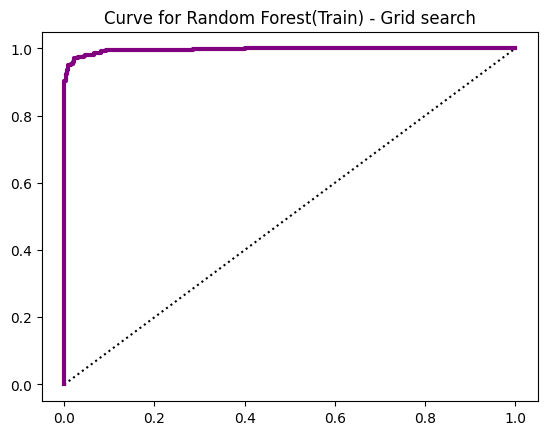

True Negative - 307
False Positive - 15
False Negative - 16
True Positve - 723
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       322
         1.0       0.98      0.98      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.97      0.97      1061
weighted avg       0.97      0.97      0.97      1061



In [267]:
##
##
## lets see the scores for the train dataframe

print(rforest.score(X2_train, y2_train))


## predict probabilities
prob = rforest.predict_proba(X2_train)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_train, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y2_train, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(train_fpr, train_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Random Forest(Train) - Grid search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_train, y2_train_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_train, y2_train_predict))



0.8333333333333334
AUC: 0.889


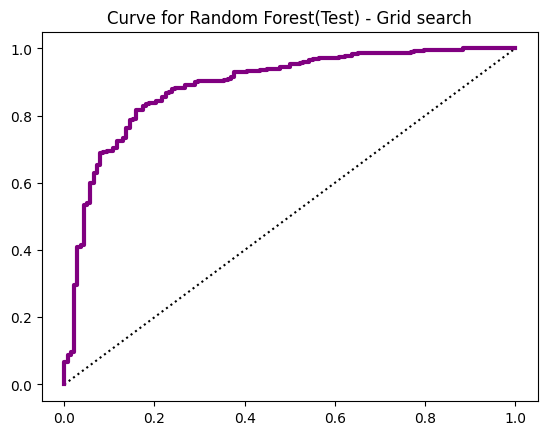

True Negative - 93
False Positive - 45
False Negative - 31
True Positve - 287
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       138
         1.0       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [268]:
##
##
## lets see the scores for the test dataframe

print(rforest.score(X2_test, y2_test))


## predict probabilities
prob = rforest.predict_proba(X2_test)
prob = prob[:, 1]

## calculating AUC
auc = roc_auc_score(y2_test, prob)
print('AUC: %.3f' % auc)

## calculating roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y2_test, prob)
plt.plot([0, 1], [0, 1], linestyle = 'dotted', color = 'black')

## plotting the roc curve for the model
plt.plot(test_fpr, test_tpr, linewidth = 3, color = 'purple')
plt.title("Curve for Random Forest(Test) - Grid search")
plt.show()


## now the confusion matrix

tn, fp, fn, tp = confusion_matrix(y2_test, y2_test_predict).ravel()

print('True Negative - ' + str(tn))
print('False Positive - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positve - ' + str(tp))


## classification report

print(classification_report(y2_test, y2_test_predict))

